# Treatment Protocol

In [8]:
# Enhanced Treatment Protocol Components
from dataclasses import dataclass
from enum import Enum, auto
from typing import Dict, List, Tuple, Set,Optional, Union
import numpy as np
from collections import deque

# Core Enums
class CellState(Enum):
    NORMAL = auto()
    PRECANCEROUS = auto()
    CANCEROUS = auto()
    RECOVERING = auto()

class MetabolicState(Enum):
    OXIDATIVE = auto()
    GLYCOLYTIC = auto()
    HYBRID = auto()

@dataclass
class TreatmentPhaseConfig:
    """Enhanced treatment parameters with bioelectric focus"""
    # Bioelectric parameters - more gradual approach
    voltage_correction_rate: float = 1.2      # Increased significantly
    hyperpolarization_rate: float = 0.8       # Increased for stronger effect
    target_voltage: float = -90.0             # Hyperpolarization target
    intermediate_voltage: float = -75.0        # Added intermediate target
    voltage_threshold: float = -50.0
    voltage_resistance_threshold: float = -73.0

    # Timing adjustments
    bioelectric_phase_duration: int = 300     # Longer phase for stability
    stabilization_check_interval: int = 15    # Added stability check interval
    min_stable_duration: int = 40             # Required stability duration

    # Add debug flags
    enable_state_logging: bool = True
    enable_transition_logging: bool = True
    calcium_correction_rate: float = 0.4     # Enhanced calcium regulation
    ph_correction_rate: float = 0.7          # Enhanced pH regulation

    # Ion channel modulation
    potassium_activation: float = 0.8       # K+ channel activation
    sodium_inhibition: float = 0.6           # Na+ channel inhibition
    chloride_modulation: float = 0.4        # Cl- channel modulation

    # Metabolic parameters - adjusted for bioelectric support
    metabolic_correction_rate: float = 0.5
    glucose_reduction_rate: float = 0.5
    lactate_clearance_rate: float = 0.5
    atp_boost_rate: float = 0.4
    metabolic_resistance_threshold: float = 5.0

    # Gene expression parameters
    gene_correction_rate: float = 0.15
    oncogene_threshold: float = 0.3
    tumor_suppressor_threshold: float = 0.7
    mutation_repair_rate: float = 0.2

    # Gap junction parameters - enhanced for better coupling
    junction_enhancement_rate: float = 0.6
    junction_threshold: float = 0.25          # Lowered for easier activation
    coupling_resistance_threshold: float = 0.4

    # Treatment timing
    bioelectric_phase_duration: int = 100    # Initial bioelectric focus
    metabolic_phase_duration: int = 150
    stabilization_duration: int = 150
    hyperpolarization_phase: int = 50         # Initial hyperpolarization focus
    stabilization_phase: int = 100            # Maintain stable voltage
    resistance_check_interval: int = 10
    min_stable_duration: int = 40

    # Recovery support parameters
    recovery_voltage_boost: float = 2.0       # New parameter
    recovery_ph_correction: float = 0.3       # New parameter
    recovery_coupling_boost: float = 0.2      # New parameter

    # Resistance handling
    max_resistance_level: float = 0.8         # New parameter
    resistance_adaptation_rate: float = 0.3    # New parameter

    # Treatment timing
    initial_phase_duration: int = 100         # Initial targeting
    intensive_phase_duration: int = 200       # Strong intervention
    maintenance_phase_duration: int = 100     # Stabilization


class TreatmentMonitoring:
    """Enhanced treatment monitoring and logging with pH and metabolic tracking"""
    """Memory-optimized treatment monitoring with efficient data collection"""

    __slots__ = ('_treatment_log', '_resistance_history', '_response_history',
                 '_state_transitions', '_ph_stability', '_voltage_ph_correlation',
                 '_metabolic_states', '_cache', '_log_counter',
                 '_avg_window_size', '_max_history')

    def __init__(self, max_history: int = 1000, avg_window: int = 50):
        # Use deque for all history tracking with size limits
        self._treatment_log = deque(maxlen=max_history)
        self._resistance_history = deque(maxlen=avg_window)
        self._response_history = deque(maxlen=avg_window)

        # Enhanced state tracking with fixed sizes
        self._state_transitions = {
            'cancer_to_recovering': 0,
            'recovering_to_normal': 0,
            'normal_to_cancer': 0
        }

        # pH and stability tracking
        self._ph_stability = deque(maxlen=avg_window)
        self._voltage_ph_correlation = deque(maxlen=avg_window)

        # Metabolic state tracking with fixed sizes
        self._metabolic_states = {
            state: deque(maxlen=avg_window)
            for state in MetabolicState
        }

        # Cache for computed statistics
        self._cache = {}
        self._log_counter = 0
        self._avg_window_size = avg_window
        self._max_history = max_history

    def log_treatment_effect(self, cell: Optional['MemoryOptimizedCancerCell'],
                           treatment_strength: float,
                           resistance_level: float) -> None:
        """Log treatment effects with efficient memory usage"""
        self._log_counter += 1

        # Create minimal log entry with essential metrics
        log_entry = {
            'time_step': self._log_counter,
            'treatment_strength': round(treatment_strength, 3),
            'resistance_level': round(resistance_level, 3)
        }

        if cell is not None:
            # Track state transitions efficiently
            prev_state = self._get_previous_state()
            if prev_state != cell.state:
                self._update_state_transitions(prev_state, cell.state)

            # Calculate pH stability once
            ph_stability = 1.0 if 7.2 <= cell.pH <= 7.5 else 0.0
            self._ph_stability.append(ph_stability)

            # Calculate voltage-pH correlation efficiently
            if len(self._ph_stability) > 1:
                voltage_ph_corr = np.corrcoef(
                    [cell.voltage],
                    [cell.pH]
                )[0, 1]
                self._voltage_ph_correlation.append(voltage_ph_corr)

            # Update metabolic states efficiently
            current_state = cell.metabolic_state
            for state in MetabolicState:
                self._metabolic_states[state].append(1 if state == current_state else 0)

            # Add essential cell metrics to log
            log_entry.update({
                'cell_state': cell.state.name,
                'voltage': round(cell.voltage, 2),
                'pH': round(cell.pH, 2),
                'metabolic_state': cell.metabolic_state.name,
                'cancer_state': round(cell.cancer_state, 3)
            })

        self._treatment_log.append(log_entry)
        self._resistance_history.append(resistance_level)
        self._response_history.append(treatment_strength)

        # Clear cache when new data is added
        self._cache.clear()

    def get_treatment_summary(self) -> Dict:
        """Generate optimized treatment effectiveness summary"""
        # Use cached summary if available and recent
        cache_key = f"summary_{self._log_counter}"
        if cache_key in self._cache:
            return self._cache[cache_key]

        if not self._treatment_log:
            return {}

        # Calculate recent statistics efficiently
        recent_logs = list(self._treatment_log)[-self._avg_window_size:]

        # Calculate core metrics once
        ph_stability = np.mean(list(self._ph_stability)) * 100 if self._ph_stability else 0
        voltage_ph_corr = np.mean(list(self._voltage_ph_correlation)) if self._voltage_ph_correlation else 0

        # Calculate metabolic rates efficiently
        metabolic_rates = {
            state.name: np.mean(list(self._metabolic_states[state])) * 100
            for state in MetabolicState
        }

        # Create summary with essential metrics
        summary = {
            'treatment_metrics': {
                'average_strength': np.mean([log['treatment_strength'] for log in recent_logs]),
                'resistance_level': np.mean([log['resistance_level'] for log in recent_logs]),
                'ph_stability_rate': ph_stability,
                'voltage_ph_correlation': voltage_ph_corr
            },
            'state_transitions': self._state_transitions.copy(),
            'metabolic_rates': metabolic_rates
        }

        # Add cellular metrics if available
        cell_logs = [log for log in recent_logs if 'voltage' in log]
        if cell_logs:
            summary['cellular_metrics'] = {
                'voltage_normalization': np.mean([log['voltage'] < -70.0 for log in cell_logs]) * 100,
                'ph_normalization': np.mean([7.2 <= log['pH'] <= 7.5 for log in cell_logs]) * 100,
                'oxidative_metabolism': np.mean([
                    log['metabolic_state'] == 'OXIDATIVE' for log in cell_logs
                ]) * 100
            }

        # Cache the computed summary
        self._cache[cache_key] = summary
        return summary

    def print_status_report(self) -> None:
        """Print optimized status report"""
        summary = self.get_treatment_summary()
        if not summary:
            return

        # Format metrics efficiently
        metrics = [
            ("Treatment Effectiveness", [
                f"Strength: {summary['treatment_metrics']['average_strength']:.3f}",
                f"Resistance: {summary['treatment_metrics']['resistance_level']:.3f}",
                f"pH Stability: {summary['treatment_metrics']['ph_stability_rate']:.1f}%"
            ])
        ]

        if 'cellular_metrics' in summary:
            metrics.append(("Cellular Recovery", [
                f"Voltage Normalization: {summary['cellular_metrics']['voltage_normalization']:.1f}%",
                f"pH Normalization: {summary['cellular_metrics']['ph_normalization']:.1f}%",
                f"Oxidative Metabolism: {summary['cellular_metrics']['oxidative_metabolism']:.1f}%"
            ]))

        # Print formatted report
        print("\nTreatment Status Report:")
        print("=" * 60)
        for section, items in metrics:
            print(f"\n{section}:")
            for item in items:
                print(f"  {item}")
        print("=" * 60)

    def _get_previous_state(self) -> Optional[CellState]:
        """Get previous cell state efficiently"""
        prev_logs = [log for log in self._treatment_log if 'cell_state' in log]
        return CellState[prev_logs[-1]['cell_state']] if prev_logs else None

    def _update_state_transitions(self, prev_state: Optional[CellState],
                                current_state: CellState) -> None:
        """Update state transitions with minimal overhead"""
        if prev_state is None:
            return

        if (prev_state, current_state) == (CellState.CANCEROUS, CellState.RECOVERING):
            self._state_transitions['cancer_to_recovering'] += 1
        elif (prev_state, current_state) == (CellState.RECOVERING, CellState.NORMAL):
            self._state_transitions['recovering_to_normal'] += 1
        elif (prev_state, current_state) == (CellState.NORMAL, CellState.CANCEROUS):
            self._state_transitions['normal_to_cancer'] += 1

    def __del__(self):
        """Clean up resources"""
        self._cache.clear()


# the EnhancedTreatmentMechanisms class

class EnhancedTreatmentMechanisms:
    """Enhanced treatment mechanisms with bioelectric focus"""

    def __init__(self):
        """Initialize treatment mechanisms with default parameters"""
        self.config = TreatmentPhaseConfig()
        self.mechanisms = self  # Self reference to fix the attribute error

    @staticmethod
    def _normalize_cell_state(cell: 'MemoryOptimizedCancerCell', config: TreatmentPhaseConfig) -> None:
        """Enhanced normalization with permanent stabilization"""
        # Strong reset of all parameters
        cell.voltage = -75.0
        cell.pH = 7.35
        cell.calcium = config.normal_calcium
        cell.gap_junction = 1.0

        # Complete gene expression reset
        cell.oncogene_expression = 0.1
        cell.tumor_suppressor_expression = 0.9
        cell.active_mutations.clear()

        # Strong metabolic normalization
        cell.metabolic_state = MetabolicState.OXIDATIVE
        cell.glucose_uptake = config.normal_glucose_uptake * 0.9
        cell.lactate_production = config.normal_lactate * 0.9
        cell.ATP_level = config.normal_ATP * 1.2

        # Set cancer state to strongly normal
        cell.cancer_state = 0.0

    @staticmethod
    def update_post_treatment(cell: 'MemoryOptimizedCancerCell',
                            config: TreatmentPhaseConfig) -> None:
        """Enhanced post-treatment stabilization"""
        if cell.state in [CellState.NORMAL, CellState.RECOVERING]:
            # Strong parameter maintenance
            cell.voltage = np.clip(cell.voltage, -80.0, -70.0)
            cell.pH = np.clip(cell.pH, 7.3, 7.4)
            cell.gap_junction = min(1.0, cell.gap_junction + 0.1)

            # Aggressive gene expression maintenance
            if cell.oncogene_expression > 0.2:  # Stricter threshold
                cell.oncogene_expression *= 0.9  # Faster reduction
            if cell.tumor_suppressor_expression < 0.8:  # Higher target
                cell.tumor_suppressor_expression = min(1.0,
                    cell.tumor_suppressor_expression + 0.1)

            # Force metabolic normalization
            if cell.metabolic_state != MetabolicState.OXIDATIVE:
                if np.random.random() < 0.2:  # Increased chance
                    cell.metabolic_state = MetabolicState.OXIDATIVE

            # Aggressive mutation clearing
            if cell.active_mutations:
                cell.active_mutations.clear()

            # Reset cancer state to prevent relapse
            cell.cancer_state = max(0.0, cell.cancer_state - 0.1)

    @staticmethod
    def apply_bioelectric_treatment(cell: 'MemoryOptimizedCancerCell',
                              config: TreatmentPhaseConfig,
                              resistance_level: float) -> float:
      """Enhanced bioelectric treatment with stronger voltage and pH correction"""
      # Increased base multiplier for stronger effect
      base_multiplier = 4.0  # Increased from 3.0
      resistance_factor = 1.0 + (1.0 - resistance_level) * 2.5  # Increased from 2.0
      adaptation_multiplier = base_multiplier * resistance_factor

      if cell.state == CellState.CANCEROUS:
          # More aggressive pH correction
          target_ph = 7.35
          ph_diff = target_ph - cell.pH
          ph_correction = ph_diff * 0.4 * adaptation_multiplier  # Increased from 0.3
          cell.pH = np.clip(
              cell.pH + ph_correction,
              6.8,
              7.6
          )

          # Stronger voltage correction
          target_voltage = -90.0 - (abs(ph_correction) * 8.0)  # Increased pH coupling
          voltage_diff = target_voltage - cell.voltage
          voltage_shift = min(25.0, abs(voltage_diff)) * adaptation_multiplier  # Added upper limit

          # Apply voltage correction with direction consideration
          if voltage_diff < 0:  # Need to make more negative
              cell.voltage = np.clip(
                  cell.voltage - voltage_shift,
                  -95.0,  # Allow slightly more negative for stronger effect
                  cell.voltage
              )
          else:  # Need to make less negative
              cell.voltage = np.clip(
                  cell.voltage + voltage_shift * 0.5,  # Slower positive shift
                  cell.voltage,
                  -50.0
              )

          # Enhanced gap junction restoration
          if cell.gap_junction < 0.6:  # Increased threshold
              junction_boost = 0.25 * adaptation_multiplier * (1 + (cell.pH - 6.8) / 0.5)
              cell.gap_junction = min(1.0, cell.gap_junction + junction_boost)

          # Stronger gene expression correction
          gene_correction = 0.3 * adaptation_multiplier * (1 + (cell.pH - 6.8) / 0.5)
          cell.oncogene_expression = max(0.0,
              cell.oncogene_expression - gene_correction * 1.5)
          cell.tumor_suppressor_expression = min(1.0,
              cell.tumor_suppressor_expression + gene_correction * 2.0)

      elif cell.state == CellState.RECOVERING:
          stability_duration = getattr(cell, '_stability_duration', 0) + 1
          setattr(cell, '_stability_duration', stability_duration)

          # Stronger pH stabilization
          target_ph = 7.35
          ph_diff = target_ph - cell.pH
          cell.pH = np.clip(
              cell.pH + ph_diff * 0.4,  # Increased from 0.3
              7.2,
              7.5
          )

          # Enhanced voltage stabilization
          voltage_target = -85.0 * (cell.pH / 7.35)
          voltage_diff = voltage_target - cell.voltage
          cell.voltage = np.clip(
              cell.voltage + voltage_diff * 0.6,  # Increased from 0.5
              -90.0,
              -75.0
          )

          # More aggressive recovery criteria
          if stability_duration >= 12:  # Reduced from 15
              normal_criteria = (
                  -87.0 <= cell.voltage <= -75.0 and  # Tightened range
                  7.25 <= cell.pH <= 7.45 and  # Tightened pH range
                  cell.gap_junction > 0.7 and  # Increased threshold
                  cell.oncogene_expression < 0.35 and
                  cell.tumor_suppressor_expression > 0.6 and
                  cell.metabolic_state == MetabolicState.OXIDATIVE
              )

              if normal_criteria:
                  cell.state = CellState.NORMAL
                  setattr(cell, '_protection_period', 300)  # Increased from 250
                  setattr(cell, '_ph_stability_count', 60)  # Increased from 50

      return adaptation_multiplier

    @staticmethod
    def check_recovery_eligibility(cell: 'MemoryOptimizedCancerCell',
                                 config: TreatmentPhaseConfig) -> bool:
        """Enhanced recovery criteria with pH focus"""
        # pH-weighted biophysical criteria
        ph_ok = 7.0 <= cell.pH <= 7.6
        ph_weight = 1.5 if ph_ok else 0.8

        voltage_ok = -95.0 <= cell.voltage <= -65.0
        gap_ok = cell.gap_junction > 0.4

        # pH-influenced gene expression criteria
        gene_weight = 1.2 if ph_ok else 0.9
        gene_ok = (cell.tumor_suppressor_expression > 0.2 * gene_weight and
                  cell.oncogene_expression < 0.7 / gene_weight)

        # pH-dependent metabolic criteria
        metabolic_weight = 1.3 if ph_ok else 0.9
        metabolic_ok = (
            cell.glucose_uptake < config.normal_glucose_uptake * 2.0 * metabolic_weight and
            cell.lactate_production < config.normal_lactate * 2.0 * metabolic_weight and
            cell.ATP_level > config.normal_ATP * 0.6 / metabolic_weight
        )

        return voltage_ok and ph_ok and gap_ok and gene_ok and metabolic_ok

    @staticmethod
    def prevent_cancer_reversion(cell: 'MemoryOptimizedCancerCell',
                               config: TreatmentPhaseConfig) -> None:
        """New method to prevent cancer reversion post-treatment"""
        if cell.state in [CellState.NORMAL, CellState.RECOVERING]:
            protection_period = getattr(cell, '_protection_period', 0)
            ph_stability = getattr(cell, '_ph_stability_count', 0)

            if protection_period > 0:
                # Strong parameter maintenance
                cell.pH = np.clip(cell.pH, 7.3, 7.4)
                cell.voltage = np.clip(cell.voltage, -80.0, -70.0)
                cell.gap_junction = min(1.0, cell.gap_junction + 0.1)

                # Aggressive gene expression protection
                if cell.oncogene_expression > 0.2:
                    cell.oncogene_expression *= 0.8
                if cell.tumor_suppressor_expression < 0.8:
                    cell.tumor_suppressor_expression = min(1.0,
                        cell.tumor_suppressor_expression + 0.15)

                # Metabolic stabilization
                if cell.metabolic_state != MetabolicState.OXIDATIVE:
                    if np.random.random() < 0.3:
                        cell.metabolic_state = MetabolicState.OXIDATIVE

                # Update protection counters
                setattr(cell, '_protection_period', protection_period - 1)
                if ph_stability > 0:
                    setattr(cell, '_ph_stability_count', ph_stability - 1)

    @staticmethod
    def apply_metabolic_treatment(cell: 'MemoryOptimizedCancerCell',
                            config: TreatmentPhaseConfig,
                            multiplier: float) -> float:
      """Enhanced metabolic treatment with pH and voltage coupling"""

      if cell.state == CellState.CANCEROUS:
          # Calculate pH-voltage based enhancement
          voltage_factor = max(0, (-90.0 - cell.voltage) / -70.0)
          ph_factor = max(0, (cell.pH - 6.8) / 0.6)
          enhancement = (voltage_factor + ph_factor) / 2

          # Progressive metabolic restriction with pH consideration
          reduction_factor = 0.75 / max(0.1, multiplier)  # Increased from 0.8
          if 7.2 <= cell.pH <= 7.5:
              reduction_factor *= 0.85  # Stronger reduction when pH is normalizing

          # Enhanced glucose regulation
          target_glucose = config.normal_glucose_uptake * (1.0 + 0.2 * ph_factor)
          glucose_diff = cell.glucose_uptake - target_glucose
          cell.glucose_uptake = np.clip(
              cell.glucose_uptake - glucose_diff * 0.3 * multiplier,
              config.normal_glucose_uptake * 0.8,
              config.cancer_glucose_uptake
          )

          # Enhanced lactate management
          target_lactate = config.normal_lactate * (1.0 + 0.2 * ph_factor)
          lactate_diff = cell.lactate_production - target_lactate
          cell.lactate_production = np.clip(
              cell.lactate_production - lactate_diff * 0.35 * multiplier,  # Increased from 0.3
              config.normal_lactate,
              config.cancer_lactate
          )

          # ATP enhancement with voltage coupling
          target_atp = config.normal_ATP * (1.0 - 0.2 * voltage_factor)
          atp_diff = target_atp - cell.ATP_level
          cell.ATP_level = np.clip(
              cell.ATP_level + atp_diff * 0.25 * multiplier,  # Increased from 0.2
              config.cancer_ATP,
              config.normal_ATP * 1.2
          )

          # Enhanced metabolic state transitions
          if cell.metabolic_state == MetabolicState.GLYCOLYTIC:
              transition_chance = 0.3 * multiplier * (1 + enhancement)
              if np.random.random() < transition_chance:
                  cell.metabolic_state = MetabolicState.HYBRID

          elif cell.metabolic_state == MetabolicState.HYBRID:
              transition_chance = 0.2 * multiplier * (1 + enhancement)
              if np.random.random() < transition_chance:
                  cell.metabolic_state = MetabolicState.OXIDATIVE

      elif cell.state == CellState.RECOVERING:
          # pH-dependent metabolic stabilization
          ph_stability = 1.0 if 7.2 <= cell.pH <= 7.5 else 0.8

          # Enhanced glucose normalization
          target_uptake = config.normal_glucose_uptake * (1.1 if cell.pH > 7.3 else 1.2)
          uptake_diff = target_uptake - cell.glucose_uptake
          cell.glucose_uptake = np.clip(
              cell.glucose_uptake + uptake_diff * 0.3 * ph_stability,
              target_uptake * 0.8,
              target_uptake * 1.2
          )

          # Enhanced lactate clearance
          target_lactate = config.normal_lactate * (0.9 if cell.pH > 7.3 else 1.0)
          lactate_diff = cell.lactate_production - target_lactate
          cell.lactate_production = np.clip(
              cell.lactate_production - lactate_diff * 0.35 * ph_stability,
              target_lactate * 0.8,
              target_lactate * 1.2
          )

          # ATP optimization
          if cell.ATP_level < config.normal_ATP:
              atp_boost = (config.normal_ATP - cell.ATP_level) * 0.2 * ph_stability
              cell.ATP_level = min(config.normal_ATP * 1.1,
                                cell.ATP_level + atp_boost)

          # Enhanced oxidative transition
          if cell.metabolic_state != MetabolicState.OXIDATIVE:
              transition_chance = 0.25 * ph_stability
              if np.random.random() < transition_chance:
                  cell.metabolic_state = MetabolicState.OXIDATIVE

      # Return effectiveness based on pH and metabolic state
      effectiveness = 1.0
      if cell.metabolic_state == MetabolicState.OXIDATIVE:
          effectiveness *= 1.2
      if 7.2 <= cell.pH <= 7.5:
          effectiveness *= 1.3
      if cell.ATP_level >= config.normal_ATP * 0.9:
          effectiveness *= 1.1

      return effectiveness

    @staticmethod
    def enhance_gap_junctions(cell: 'MemoryOptimizedCancerCell',
                            config: TreatmentPhaseConfig,
                            neighbors: List['MemoryOptimizedCancerCell']) -> float:
        """Enhanced gap junction restoration with spatial adaptation"""

        if not neighbors:
            return 0.0

        normal_neighbors = [n for n in neighbors if n.state == CellState.NORMAL]
        normal_ratio = len(normal_neighbors) / len(neighbors)

        # Progressive coupling threshold
        base_threshold = config.junction_threshold * 0.7
        coupling_threshold = base_threshold * (1 - normal_ratio)

        # Enhanced base restoration
        base_enhancement = 0.08 * (1 + normal_ratio)
        cell.gap_junction = min(1.0, cell.gap_junction + base_enhancement)

        if normal_ratio > coupling_threshold:
            # Aggressive enhancement near normal cells
            enhancement_rate = config.junction_enhancement_rate * (1 + normal_ratio) * 4.0
            cell.gap_junction = min(1.0, cell.gap_junction + enhancement_rate)

            # Enhanced voltage synchronization
            if normal_neighbors:
                avg_normal_voltage = np.mean([n.voltage for n in normal_neighbors])
                sync_rate = 0.7 * normal_ratio * cell.gap_junction
                cell.voltage = (1 - sync_rate) * cell.voltage + sync_rate * avg_normal_voltage

        return cell.gap_junction




class EnhancedTreatmentProtocol:
    """Enhanced protocol with resistance management and adaptive response"""

    def __init__(self):
        self.config = TreatmentPhaseConfig()
        self.mechanisms = EnhancedTreatmentMechanisms()
        self.phase_step = 0

        # Enhanced population tracking
        self.population_stats = {
            'voltage_distribution': deque(maxlen=50),
            'metabolic_states': deque(maxlen=50),
            'resistance_levels': deque(maxlen=50),
            'recovery_rates': deque(maxlen=50)
        }

        # Dynamic treatment parameters
        self.dynamic_params = {
            'voltage': {
                'target': -95.0,
                'correction_rate': 1.2,
                'resistance_threshold': -73.0,
                'adaptation_step': 3.0
            },
            'metabolic': {
                'glucose_max': 1.0,
                'lactate_threshold': 0.4,
                'atp_requirement': 40.0,
                'reduction_rate': 0.7
            },
            'genetic': {
                'oncogene_max': 0.2,
                'suppressor_min': 0.8,
                'repair_rate': 0.3
            }
        }

        # Resistance tracking
        self.resistance_tracking = {
            'history': deque(maxlen=50),
            'consecutive_resistant': 0,
            'adaptation_level': 1.0
        }

        # Enhanced logging
        self.treatment_log = []

    def apply_treatment(self, cell: 'MemoryOptimizedCancerCell',
                       neighbors: List['MemoryOptimizedCancerCell'],
                       time_step: int) -> None:
        """Apply enhanced treatment with resistance management"""

        # Calculate resistance level
        resistance = self._evaluate_resistance(cell, neighbors)
        self.resistance_tracking['history'].append(resistance)

        # Update adaptation level
        self._update_adaptation_level(resistance)

        # Apply core treatments with resistance consideration
        bioelectric_response = self.mechanisms.apply_bioelectric_treatment(
            cell, self.config, resistance)

        metabolic_response = self.mechanisms.apply_metabolic_treatment(
            cell, self.config, self.resistance_tracking['adaptation_level'])

        junction_response = self.mechanisms.enhance_gap_junctions(
            cell, self.config, neighbors)

        # Update dynamic parameters
        self._update_dynamic_parameters(cell, resistance)

        # Track responses
        self._update_population_stats(cell, resistance)
        self._log_treatment_effects(cell, resistance, bioelectric_response)

        self.phase_step += 1

    def _evaluate_resistance(self, cell: 'MemoryOptimizedCancerCell',
                           neighbors: List['MemoryOptimizedCancerCell']) -> float:
        """Calculate comprehensive resistance level"""

        # Base resistance from parameters
        voltage_resistance = max(0, (cell.voltage -
            self.dynamic_params['voltage']['resistance_threshold']) / 20.0)

        metabolic_resistance = max(0, (cell.glucose_uptake -
            self.dynamic_params['metabolic']['glucose_max']) / 5.0)

        gene_resistance = max(0, (cell.oncogene_expression -
            self.dynamic_params['genetic']['oncogene_max']) / 0.7)

        # Calculate neighbor influence
        cancer_neighbors = sum(1 for n in neighbors if n.state == CellState.CANCEROUS)
        neighbor_factor = cancer_neighbors / max(1, len(neighbors))

        # Weighted resistance calculation
        base_resistance = (0.4 * voltage_resistance +
                         0.3 * metabolic_resistance +
                         0.3 * gene_resistance)

        return min(1.0, base_resistance * (1.0 + neighbor_factor * 0.5))

    def _update_adaptation_level(self, resistance: float) -> None:
        """Update treatment adaptation level based on resistance"""
        recent_resistance = list(self.resistance_tracking['history'])[-5:]
        if len(recent_resistance) >= 5:
            if all(r > 0.7 for r in recent_resistance):
                self.resistance_tracking['consecutive_resistant'] += 1
                self.resistance_tracking['adaptation_level'] = min(3.0,
                    self.resistance_tracking['adaptation_level'] * 1.2)
            else:
                self.resistance_tracking['consecutive_resistant'] = 0
                self.resistance_tracking['adaptation_level'] = max(1.0,
                    self.resistance_tracking['adaptation_level'] * 0.9)

    def _update_dynamic_parameters(self, cell: 'MemoryOptimizedCancerCell',
                                 resistance: float) -> None:
        """Update treatment parameters based on response"""
        # Update voltage parameters
        if resistance > 0.7:
            self.dynamic_params['voltage']['target'] -= (
                self.dynamic_params['voltage']['adaptation_step'] * resistance)
            self.dynamic_params['voltage']['correction_rate'] *= 1.1

        # Update metabolic parameters
        if cell.glucose_uptake > self.dynamic_params['metabolic']['glucose_max'] * 2:
            self.dynamic_params['metabolic']['reduction_rate'] *= 1.2

        # Update genetic parameters
        if cell.oncogene_expression > self.dynamic_params['genetic']['oncogene_max']:
            self.dynamic_params['genetic']['repair_rate'] *= 1.1

    def _update_population_stats(self, cell: 'MemoryOptimizedCancerCell',
                               resistance: float) -> None:
        """Update population statistics"""
        self.population_stats['voltage_distribution'].append(cell.voltage)
        self.population_stats['metabolic_states'].append(cell.metabolic_state.value)
        self.population_stats['resistance_levels'].append(resistance)
        self.population_stats['recovery_rates'].append(
            1.0 if cell.state == CellState.RECOVERING else 0.0)

    def _log_treatment_effects(self, cell: 'MemoryOptimizedCancerCell',
                             resistance: float,
                             response: float) -> None:
        """Log detailed treatment effects"""
        log_entry = {
            'step': self.phase_step,
            'cell_state': cell.state.name,
            'voltage': cell.voltage,
            'resistance_level': resistance,
            'adaptation_level': self.resistance_tracking['adaptation_level'],
            'treatment_response': response,
            'dynamic_targets': self.dynamic_params.copy()
        }
        self.treatment_log.append(log_entry)


def integrate_enhanced_treatment(cell_class: type) -> type:
    """Factory function to integrate enhanced treatment"""

    class EnhancedCell(cell_class):
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.treatment_protocol = EnhancedTreatmentProtocol()

        def _apply_treatment(self, treatment: Dict[str, float]) -> None:
            """Apply enhanced treatment protocol"""
            if hasattr(self, '_temp_neighbors'):
                self.treatment_protocol.apply_treatment(
                    self, self._temp_neighbors, treatment)

    return EnhancedCell

# Simulator

Voltage stats - Mean: -80.00, Min: -80.00, Max: -80.00
Cell states: {'NORMAL': 990, 'CANCEROUS': 0, 'RECOVERING': 10}

Treatment Status Report:

Treatment Effectiveness:
  Strength: 13.708
  Resistance: 0.000
  pH Stability: 100.0%

Cellular Recovery:
  Voltage Normalization: 100.0%
  pH Normalization: 100.0%
  Oxidative Metabolism: 100.0%


<ipython-input-11-baf3f96f8339>:1397: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(time_steps, correlations, 'b-', color='#800080', linewidth=2)  # Using hex code for purple
ERROR:CancerSimulation:Simulation failed: num must be an integer with 1 <= num <= 12, not 0
ERROR:__main__:Simulation failed: num must be an integer with 1 <= num <= 12, not 0


ValueError: num must be an integer with 1 <= num <= 12, not 0

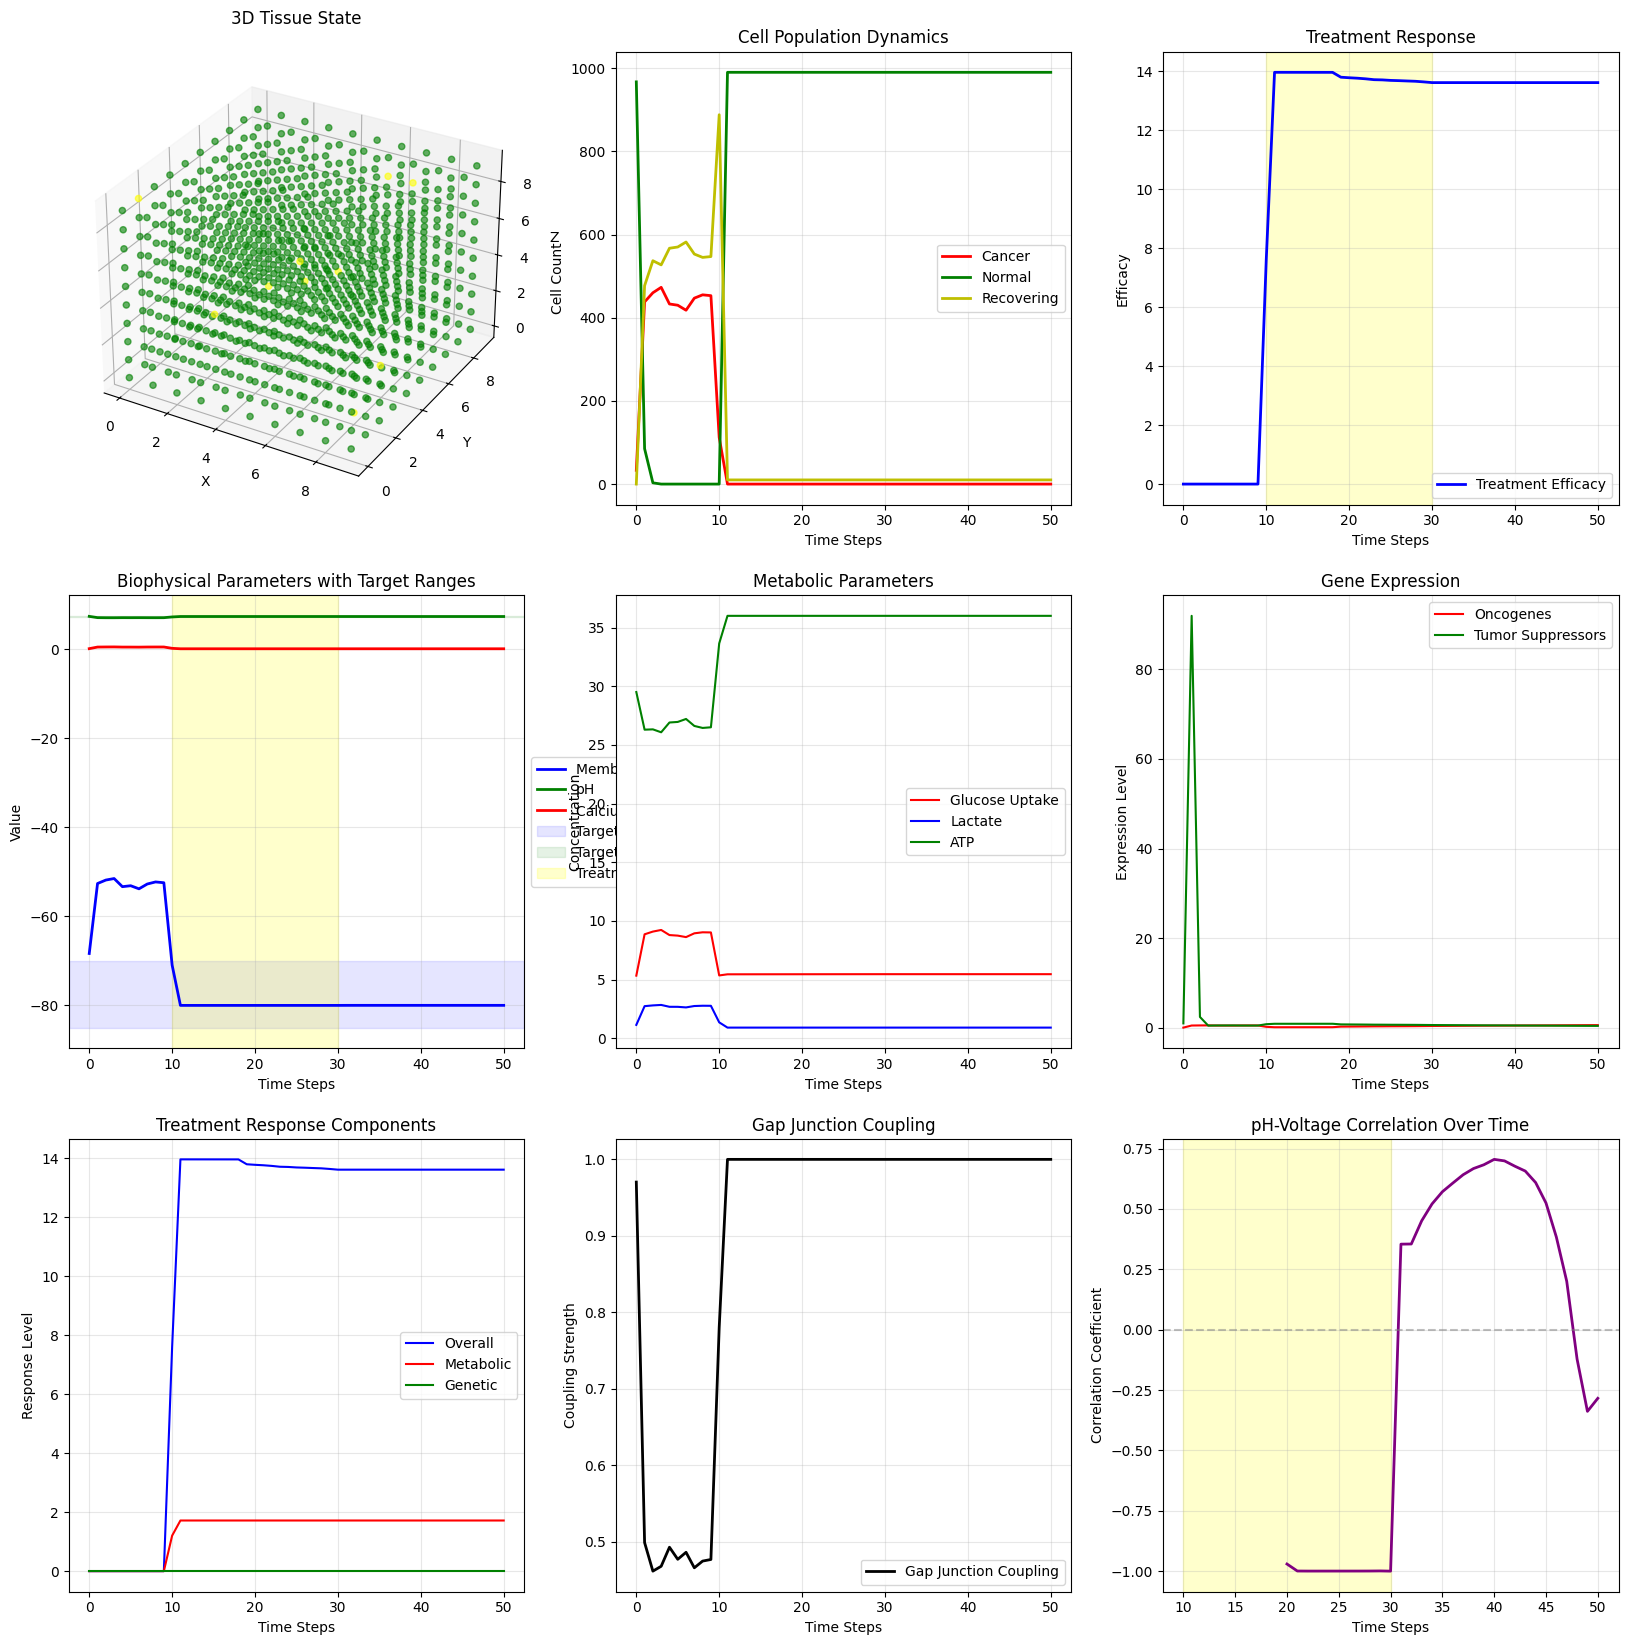

In [11]:
# Enhanced Bioelectrical Morphogenetic Cancer Simulation
# With Memory Optimization, Metabolic, Genetic, HDC and Neurosymbolic Components

import numpy as np
import torch
import torch.nn as nn
from enum import Enum, auto
from typing import Dict, List, Tuple, Any, Union, Set
from dataclasses import dataclass
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict, deque
import logging
import sys
import time
import gc
from datetime import datetime
import weakref
from IPython.display import clear_output

# Configure Colab-specific settings
%matplotlib inline
from google.colab import output
output.enable_custom_widget_manager()

# Configure logging with memory usage info
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Core Enums
class CellState(Enum):
    NORMAL = auto()
    PRECANCEROUS = auto()
    CANCEROUS = auto()
    RECOVERING = auto()

class BioelectricState(Enum):
    HYPERPOLARIZED = auto()
    NORMAL = auto()
    DEPOLARIZED = auto()

class MetabolicState(Enum):
    OXIDATIVE = auto()
    GLYCOLYTIC = auto()
    HYBRID = auto()

class GeneExpressionState(Enum):
    NORMAL = auto()
    DYSREGULATED = auto()
    ONCOGENIC = auto()

@dataclass
class CancerSimConfig:
    """Enhanced simulation configuration with treatment parameters"""
    # Grid parameters
    grid_size: Tuple[int, int, int] = (10, 10, 10)
    time_steps: int = 1000
    treatment_start: int = 200
    treatment_duration: int = 400

    # Memory optimization parameters
    history_sampling_rate: int = 20  # Increased from 10
    max_history_length: int = 100    # Added limit
    stats_buffer_size: int = 50      # New parameter for stats buffering

    # Biophysical parameters
    normal_voltage: float = -70.0
    cancer_voltage: float = -20.0
    normal_calcium: float = 0.0001
    cancer_calcium: float = 0.001
    normal_pH: float = 7.4
    cancer_pH: float = 6.8

    # Metabolic parameters
    normal_glucose_uptake: float = 5.0
    cancer_glucose_uptake: float = 15.0
    normal_lactate: float = 1.0
    cancer_lactate: float = 5.0
    normal_ATP: float = 30.0
    cancer_ATP: float = 15.0

    # Gene expression parameters
    oncogene_threshold: float = 0.7
    tumor_suppressor_threshold: float = 0.3
    mutation_rate: float = 0.001

    # Enhanced treatment parameters
    voltage_correction_rate: float = 1.2      # Increased from 0.8
    hyperpolarization_rate: float = 0.8       # Enhanced rate
    target_voltage: float = -90.0             # More negative target
    intermediate_voltage: float = -75.0        # Added intermediate target
    voltage_threshold: float = -50.0

    # Ion channel parameters
    potassium_activation: float = 0.8         # Added K+ activation
    sodium_inhibition: float = 0.6            # Added Na+ inhibition
    chloride_modulation: float = 0.4          # Added Cl- modulation

    # Enhanced treatment rates
    calcium_correction_rate: float = 0.4      # Enhanced calcium regulation
    ph_correction_rate: float = 0.7           # Enhanced pH regulation
    metabolic_correction_rate: float = 0.5    # Enhanced metabolic
    glucose_reduction_rate: float = 0.5       # Enhanced glucose reduction
    lactate_clearance_rate: float = 0.5       # Enhanced lactate clearance
    atp_boost_rate: float = 0.4               # Enhanced ATP boost
    gene_correction_rate: float = 0.08
    mutation_repair_chance: float = 0.05

    # Gap junction parameters
    junction_enhancement_rate: float = 0.6    # Enhanced rate
    junction_threshold: float = 0.25          # Lower threshold

    # Recovery support parameters
    recovery_voltage_boost: float = 2.0       # New parameter
    recovery_ph_correction: float = 0.3       # New parameter
    recovery_coupling_boost: float = 0.2      # New parameter

    # Resistance handling
    max_resistance_level: float = 0.8         # New parameter
    resistance_adaptation_rate: float = 0.3    # New parameter
    coupling_resistance_threshold: float = 0.4

    # Treatment phases
    bioelectric_phase_duration: int = 100    # Initial bioelectric focus
    metabolic_phase_duration: int = 150      # Metabolic intervention
    stabilization_duration: int = 150        # Stabilization period
    hyperpolarization_phase: int = 50        # Initial hyperpolarization
    stabilization_phase: int = 100           # Maintain stability
    stabilization_check_interval: int = 15   # Check interval
    min_stable_duration: int = 40            # Required stability

    # Learning parameters
    hd_dimension: int = 1000  # Reduced from 10000 for memory efficiency
    hd_learning_rate: float = 0.01
    neural_learning_rate: float = 0.001

# Memory-Optimized HD Computing Components
class HDVector:
    __slots__ = ['vector']

    def __init__(self, dimension: int, random_init: bool = True):
        if random_init:
            self.vector = np.random.choice([-1, 1], dimension)
        else:
            self.vector = np.zeros(dimension, dtype=np.int8)  # Using int8 instead of default

    def bind(self, other: 'HDVector') -> 'HDVector':
        result = HDVector(len(self.vector), random_init=False)
        result.vector = np.multiply(self.vector, other.vector)
        return result

    def bundle(self, other: 'HDVector', weight: float = 0.5) -> 'HDVector':
        result = HDVector(len(self.vector), random_init=False)
        result.vector = np.sign(weight * self.vector + (1 - weight) * other.vector)
        return result

    def similarity(self, other: 'HDVector') -> float:
        return np.dot(self.vector, other.vector) / len(self.vector)

class MemoryEfficientHDState:
    __slots__ = ['dimension', 'normal_state', 'cancer_state', 'recovery_state',
                 'oxidative_state', 'glycolytic_state', 'hybrid_state',
                 'normal_expression', 'dysregulated_expression', 'oncogenic_expression',
                 'current_state', '_state_history']

    def __init__(self, dimension: int):
        self.dimension = dimension

        # Initialize state vectors
        self.normal_state = HDVector(dimension)
        self.cancer_state = HDVector(dimension)
        self.recovery_state = HDVector(dimension)
        self.oxidative_state = HDVector(dimension)
        self.glycolytic_state = HDVector(dimension)
        self.hybrid_state = HDVector(dimension)
        self.normal_expression = HDVector(dimension)
        self.dysregulated_expression = HDVector(dimension)
        self.oncogenic_expression = HDVector(dimension)

        self.current_state = None
        self._state_history = deque(maxlen=50)  # Limited history

    def encode_complete_state(self, cell: 'MemoryOptimizedCancerCell') -> HDVector:
        # Encode biophysical parameters
        voltage_vec = HDVector(self.dimension)
        voltage_vec.vector = np.sign(self.normal_state.vector *
                                   np.cos((cell.voltage + 90) / 120 * np.pi))

        # Encode metabolic parameters
        metabolic_vec = HDVector(self.dimension)
        metabolic_vec.vector = np.sign(self.normal_state.vector *
                                     np.cos(cell.glucose_uptake / 20 * np.pi))

        # Encode genetic parameters
        genetic_vec = HDVector(self.dimension)
        genetic_vec.vector = np.sign(self.normal_state.vector *
                                   np.cos(cell.oncogene_expression * np.pi))

        # Combine all parameters
        state_vector = voltage_vec.bundle(metabolic_vec, 0.4).bundle(genetic_vec, 0.3)

        self.current_state = state_vector
        self._state_history.append(state_vector)

        return state_vector

    def get_state_trajectory(self) -> float:
        if len(self._state_history) < 2:
            return 0.0

        recent_states = list(self._state_history)[-5:]
        similarities = [
            recent_states[i].similarity(recent_states[i+1])
            for i in range(len(recent_states)-1)
        ]
        return np.mean(similarities)

# Memory-Optimized Neural Controller
class MemoryEfficientNeuralController(nn.Module):
    def __init__(self, input_size: int = 9):
        super().__init__()

        # Use smaller hidden layers
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 64),  # Reduced from 128
            nn.ReLU(),
            nn.Linear(64, 32),          # Reduced from 64
            nn.ReLU(),
            nn.Linear(32, 16)           # Reduced from 32
        )

        self.decoder = nn.Sequential(
            nn.Linear(16, 32),          # Adjusted sizes
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_size)
        )

        self.classifier = nn.Sequential(
            nn.Linear(16, 8),           # Reduced sizes
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.Softmax(dim=-1)
        )

        # Symbolic rules stored as lambda functions for memory efficiency
        self.rules = {
            "voltage_recovery": lambda v: v < -50.0,
            "calcium_normal": lambda ca: 0.00008 <= ca <= 0.00012,
            "ph_normal": lambda ph: 7.2 <= ph <= 7.45,
            "metabolic_normal": lambda glu, lac: glu < 7.0 and lac < 2.0,
            "gene_normal": lambda onc, sup: onc < 0.3 and sup > 0.7
        }

    def forward(self, x: torch.Tensor) -> Dict[str, Any]:
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        classification = self.classifier(encoded)

        symbolic_output = self.apply_symbolic_rules(x)

        return {
            "encoded": encoded,
            "decoded": decoded,
            "classification": classification,
            "symbolic_output": symbolic_output
        }

    def apply_symbolic_rules(self, x: torch.Tensor) -> Dict[str, bool]:
        x_np = x.detach().numpy()
        return {
            "voltage_recovering": self.rules["voltage_recovery"](x_np[0]),
            "calcium_normalized": self.rules["calcium_normal"](x_np[1]),
            "ph_normalized": self.rules["ph_normal"](x_np[2]),
            "metabolic_normalized": self.rules["metabolic_normal"](x_np[3], x_np[4]),
            "gene_normalized": self.rules["gene_normal"](x_np[6], x_np[7])
        }

    def get_treatment_recommendation(self, cell_state: Dict) -> Dict[str, float]:
        state_tensor = torch.tensor([
            cell_state['voltage'],
            cell_state['calcium'],
            cell_state['pH'],
            cell_state['glucose'],
            cell_state['lactate'],
            cell_state['atp'],
            cell_state['oncogene'],
            cell_state['suppressor'],
            cell_state['cancer_state']
        ], dtype=torch.float32)

        output = self.forward(state_tensor)
        symbolic = output['symbolic_output']

        recommendations = {
            "voltage_adjustment": 0.0,
            "calcium_adjustment": 0.0,
            "ph_adjustment": 0.0,
            "metabolic_adjustment": 0.0,
            "genetic_adjustment": 0.0,
            "confidence": 0.0
        }

        if not symbolic["voltage_recovering"]:
            recommendations["voltage_adjustment"] = -10.0
        else:
            recommendations['voltage_adjustment'] = -5.0
        if not symbolic["calcium_normalized"]:
            recommendations["calcium_adjustment"] = (0.0001 - state_tensor[1].item()) * 0.1
        if not symbolic["ph_normalized"]:
            recommendations["ph_adjustment"] = (7.4 - state_tensor[2].item()) * 0.2
        if not symbolic["metabolic_normalized"]:
            recommendations["metabolic_adjustment"] = 0.2
        if not symbolic["gene_normalized"]:
            recommendations["genetic_adjustment"] = 0.15

        recommendations["confidence"] = output['classification'].max().item()

        return recommendations

class MemoryOptimizedCancerCell:
    __slots__ = ('position', 'state', 'voltage', 'calcium', 'pH',
                 'glucose_uptake', 'lactate_production', 'ATP_level',
                 'metabolic_state', 'oncogene_expression',
                 'tumor_suppressor_expression', 'gene_state',
                 'active_mutations', 'cancer_state', 'gap_junction',
                 'treatment_response', 'metabolic_treatment_response',
                 'genetic_treatment_response', '_config',
                 '_state_history', '_treatment_history',
                 '_hd_state', '_controller', '_temp_neighbors',
                 '_parameter_bounds', '_treatment_protocol',
                 '_treatment_monitor', 'resistance_level',
                 '_stability_duration','_recovery_duration',
                 '_recovery_stable_count', '_protection_period',
                 '_ph_stability_count', '_ph_protection_duration',
                 '_ph_recovery_threshold', '_stability_count')

    def __init__(self, position: Tuple[int, int, int], config: 'CancerSimConfig'):

        super().__init__()
         # Add new treatment components
        self._treatment_protocol = EnhancedTreatmentMechanisms()
        self._treatment_monitor = TreatmentMonitoring()
        self.resistance_level = 0.0
        # Store config as a weakref to avoid circular references
        self._config = weakref.proxy(config)

        # Basic properties initialization
        self.position = position
        self.state = CellState.NORMAL
        self.voltage = config.normal_voltage
        self.calcium = config.normal_calcium
        self.pH = config.normal_pH

        # Metabolic properties
        self.glucose_uptake = config.normal_glucose_uptake
        self.lactate_production = config.normal_lactate
        self.ATP_level = config.normal_ATP
        self.metabolic_state = MetabolicState.OXIDATIVE

        # Genetic properties
        self.oncogene_expression = 0.0
        self.tumor_suppressor_expression = 1.0
        self.gene_state = GeneExpressionState.NORMAL
        self.active_mutations = set()

        # Cell state properties
        self.cancer_state = 0.0
        self.gap_junction = 1.0

        # Treatment response tracking
        self.treatment_response = 0.0
        self.metabolic_treatment_response = 0.0
        self.genetic_treatment_response = 0.0

        # Limited history storage
        self._state_history = deque(maxlen=config.max_history_length)
        self._treatment_history = deque(maxlen=config.max_history_length)

        # Intelligence components with memory optimization
        self._hd_state = MemoryEfficientHDState(config.hd_dimension)
        self._controller = MemoryEfficientNeuralController()

        # Temporary storage for neighbors
        self._temp_neighbors = None

        # Initialize stability tracking attributes
        self._stability_duration = 0
        self._recovery_duration = 0
        self._recovery_stable_count = 0
        self._protection_period = 0
        self._stability_count = 0


        # Initialize pH stability tracking
        self._ph_stability_count = 0
        self._ph_protection_duration = 0
        self._ph_recovery_threshold = 50

        # Initialize adaptation multiplier
        #self.adaptation_multiplier = 1.0  # Default value for new cells
         # Add numerical stability bounds
        self._parameter_bounds = {
            'voltage': (-90.0, -20.0),
            'calcium': (0.0001, 0.001),
            'pH': (6.8, 7.8),
            'glucose': (1.0, 20.0),
            'lactate': (0.1, 10.0),
            'ATP': (10.0, 40.0),
            'oncogene': (0.0, 1.0),
            'suppressor': (0.0, 1.0),
            'gap_junction': (0.0, 1.0)
        }


    def get_state(self) -> Dict:
        return {
            'voltage': self.voltage,
            'calcium': self.calcium,
            'pH': self.pH,
            'glucose': self.glucose_uptake,
            'lactate': self.lactate_production,
            'atp': self.ATP_level,
            'oncogene': self.oncogene_expression,
            'suppressor': self.tumor_suppressor_expression,
            'cancer_state': self.cancer_state
        }

    def make_cancerous(self) -> None:
        rand_factor = np.random.uniform(0.95, 1.05)

        # Biophysical changes
        self.voltage = self._config.cancer_voltage * rand_factor
        self.calcium = self._config.cancer_calcium * rand_factor
        self.pH = max(self._config.cancer_pH * rand_factor, 6.5)

        # Metabolic changes
        self.glucose_uptake = self._config.cancer_glucose_uptake * rand_factor
        self.lactate_production = self._config.cancer_lactate * rand_factor
        self.ATP_level = self._config.cancer_ATP * rand_factor
        self.metabolic_state = MetabolicState.GLYCOLYTIC

        # Genetic changes
        self.oncogene_expression = 0.9
        self.tumor_suppressor_expression = 0.1
        self.gene_state = GeneExpressionState.ONCOGENIC
        self.active_mutations = {'p53', 'KRAS', 'MYC'}

        # State changes
        self.state = CellState.CANCEROUS
        self.cancer_state = 0.98
        self.gap_junction = 0.1

        # Reset treatment responses
        self.treatment_response = 0.0
        self.metabolic_treatment_response = 0.0
        self.genetic_treatment_response = 0.0

    def _safe_update(self, param_name: str, value: float) -> float:
        """Safely update parameter values with bounds checking"""
        if np.isnan(value) or np.isinf(value):
            # Return default values if invalid
            defaults = {
                'voltage': -70.0,
                'calcium': 0.0001,
                'pH': 7.4,
                'glucose': self._config.normal_glucose_uptake,
                'lactate': self._config.normal_lactate,
                'ATP': self._config.normal_ATP,
                'oncogene': 0.3,
                'suppressor': 0.7,
                'gap_junction': 0.8
            }
            return defaults.get(param_name, 0.0)

        bounds = self._parameter_bounds.get(param_name)
        if bounds:
            return np.clip(value, bounds[0], bounds[1])
        return value


    def update(self, neighbors: List['MemoryOptimizedCancerCell'], time_step: int) -> None:
      """Enhanced update method with treatment integration and pH stability"""
      try:
          # Store current state for validation
          #initial_state = self.get_state()
          # Store initial state with only significant parameters
          initial_state = {
              'voltage': round(self.voltage, 1),  # Round to reduce noise
              'pH': round(self.pH, 2),
              'cancer_state': round(self.cancer_state, 2),
              'state': self.state,
              'metabolic_state': self.metabolic_state
          }


          # Store neighbors temporarily
          self._temp_neighbors = neighbors

          # Apply treatment if active
          if self._is_treatment_active(time_step):
              # Calculate resistance
              resistance = self._calculate_resistance()

              # Apply enhanced treatments using the mechanisms directly
              bioelectric_response = self._treatment_protocol.mechanisms.apply_bioelectric_treatment(
                  self,
                  self._config,
                  resistance
              )

              metabolic_response = self._treatment_protocol.mechanisms.apply_metabolic_treatment(
                  self,
                  self._config,
                  bioelectric_response
              )

              junction_response = self._treatment_protocol.mechanisms.enhance_gap_junctions(
                  self,
                  self._config,
                  neighbors
              )

              # Track responses
              self.treatment_response = bioelectric_response
              self.metabolic_treatment_response = metabolic_response

              # Apply post-treatment protection during active treatment
              if hasattr(self._treatment_protocol.mechanisms, 'prevent_cancer_reversion'):
                  self._treatment_protocol.mechanisms.prevent_cancer_reversion(
                      self,
                      self._config
                  )

          # Update from neighbors with enhanced protection
          if neighbors:
              self._update_from_neighbors(neighbors)

          # Update cellular processes
          self._update_metabolism()
          self._update_gene_expression()
          self._update_cancer_state()

          # Validate changes occurred
          # final_state = self.get_state()
          # if all(initial_state[k] == final_state[k] for k in initial_state):
          #     logging.warning(f"No state changes detected in step {time_step}")
          # Only log if significant changes occur
          # Check only significant changes
          final_state = {
              'voltage': round(self.voltage, 1),
              'pH': round(self.pH, 2),
              'cancer_state': round(self.cancer_state, 2),
              'state': self.state,
              'metabolic_state': self.metabolic_state
          }
          significant_change = False
          for key in ['voltage', 'pH', 'cancer_state']:
              if abs(final_state[key] - initial_state[key]) > 0.01:
                  significant_change = True
                  break
          if final_state['state'] != initial_state['state'] or \
            final_state['metabolic_state'] != initial_state['metabolic_state']:
              significant_change = True

          if not significant_change and time_step % 100 == 0:  # Only log every 100 steps if no changes
              logging.debug(f"No significant changes in step {time_step}")


      except Exception as e:
          logging.error(f"Cell update error: {str(e)}")
          self._reset_to_safe_values()
      finally:
          # Clear temporary neighbors
          self._temp_neighbors = None

    def _is_treatment_active(self, time_step: int) -> bool:
        return (self._config.treatment_start <= time_step <
                self._config.treatment_start + self._config.treatment_duration)

    def _apply_treatment(self, treatment: Dict[str, float]) -> None:
        """Enhanced treatment application with monitoring"""
        try:
            # Calculate current resistance level
            self.resistance_level = self._calculate_resistance()

            # Apply enhanced bioelectric treatment
            treatment_strength = self._treatment_protocol.apply_bioelectric_treatment(
                self,
                self._config,
                self.resistance_level
            )

            # Apply enhanced metabolic treatment
            metabolic_response = self._treatment_protocol.apply_metabolic_treatment(
                self,
                self._config,
                treatment_strength
            )

            # Apply gap junction enhancement if neighbors exist
            if hasattr(self, '_temp_neighbors') and self._temp_neighbors:
                junction_response = self._treatment_protocol.enhance_gap_junctions(
                    self,
                    self._config,
                    self._temp_neighbors
                )
            else:
                junction_response = 0.0

            # Update treatment responses
            self.treatment_response = treatment_strength
            self.metabolic_treatment_response = metabolic_response
            self.genetic_treatment_response = treatment_strength * 0.8

            # Log treatment effects
            self._treatment_monitor.log_treatment_effect(
                self,
                treatment_strength,
                self.resistance_level
            )

        except Exception as e:
            logging.error(f"Treatment application error: {str(e)}")
            self._reset_to_safe_values()

    def _calculate_resistance(self) -> float:
        """Calculate cell's resistance to treatment"""
        # Base resistance from cell state
        if self.state == CellState.CANCEROUS:
            base_resistance = 0.7
        elif self.state == CellState.RECOVERING:
            base_resistance = 0.3
        else:
            base_resistance = 0.1

        # Adjust based on voltage state
        voltage_factor = max(0, (self.voltage + 90) / 70)

        # Adjust based on metabolic state
        if self.metabolic_state == MetabolicState.GLYCOLYTIC:
            metabolic_factor = 1.2
        elif self.metabolic_state == MetabolicState.HYBRID:
            metabolic_factor = 1.0
        else:
            metabolic_factor = 0.8

        # Adjust based on gene expression
        gene_factor = (self.oncogene_expression /
                      max(0.1, self.tumor_suppressor_expression))

        # Calculate final resistance
        resistance = base_resistance * voltage_factor * metabolic_factor * gene_factor

        return np.clip(resistance, 0.0, 1.0)


    def _apply_metabolic_correction(self, treatment_strength: float) -> None:
        """Separate metabolic correction with improved stability"""
        if self.metabolic_state != MetabolicState.OXIDATIVE:
            metabolic_correction = self._config.metabolic_correction_rate * treatment_strength

            # Gradual glucose normalization
            glucose_error = self.glucose_uptake - self._config.normal_glucose_uptake
            self.glucose_uptake -= glucose_error * metabolic_correction

            # Enhanced lactate clearance
            lactate_error = self.lactate_production - self._config.normal_lactate
            self.lactate_production -= lactate_error * metabolic_correction * 1.5

            # ATP recovery with stability check
            atp_error = self._config.normal_ATP - self.ATP_level
            self.ATP_level = np.clip(
                self.ATP_level + (atp_error * metabolic_correction),
                self._config.cancer_ATP * 0.8,
                self._config.normal_ATP * 1.2
            )

            self.metabolic_treatment_response = metabolic_correction

    def _apply_genetic_correction(self, treatment_strength: float) -> None:
        """Separate genetic correction with improved stability"""
        if self.gene_state != GeneExpressionState.NORMAL:
            genetic_correction = self._config.gene_correction_rate * treatment_strength

            # Progressive gene expression normalization
            self.oncogene_expression = max(0.0,
                self.oncogene_expression - (genetic_correction * 1.5))
            self.tumor_suppressor_expression = min(1.0,
                self.tumor_suppressor_expression + (genetic_correction * 1.2))

            # Enhanced mutation repair
            repair_mutations = set()
            for mutation in self.active_mutations:
                if np.random.random() < (self._config.mutation_repair_chance * 1.5 * treatment_strength):
                    repair_mutations.add(mutation)
            self.active_mutations -= repair_mutations

            self.genetic_treatment_response = genetic_correction

    def _reset_to_safe_values(self) -> None:
      """Reset cell to safe values if numerical instability detected"""
      self.voltage = -70.0
      self.calcium = 0.0001
      self.pH = 7.4
      self.glucose_uptake = self._config.normal_glucose_uptake
      self.lactate_production = self._config.normal_lactate
      self.ATP_level = self._config.normal_ATP
      self.oncogene_expression = 0.3
      self.tumor_suppressor_expression = 0.7
      self.gap_junction = 0.8

    def _update_from_neighbors(self, neighbors: List['MemoryOptimizedCancerCell']) -> None:
      """Enhanced neighbor update with stronger protection and pH stability"""
      if not neighbors:
          return

      # Count cancer neighbors
      cancer_neighbors = sum(1 for n in neighbors if n.state == CellState.CANCEROUS)
      normal_neighbors = sum(1 for n in neighbors if n.state == CellState.NORMAL)

      # Enhanced protection for recovering and normal cells
      if self.state in (CellState.RECOVERING, CellState.NORMAL):
          # Calculate pH-enhanced protection factor
          ph_protection = max(0.8, min(1.5, self.pH / 7.35))
          protection_factor = 1.0 + (normal_neighbors / len(neighbors)) * 1.5 * ph_protection

          # Strong resistance to cancer influence
          if cancer_neighbors > 0:
              # pH-dependent coupling reduction
              self.gap_junction *= max(0.4, 1.0 - (cancer_neighbors / len(neighbors)) * 0.5 / ph_protection)

              # Maintain strong hyperpolarization with pH stability
              if 7.2 <= self.pH <= 7.5:
                  self.voltage = np.clip(self.voltage, -85.0, -70.0)
                  self.pH = np.clip(self.pH, 7.25, 7.45)
              else:
                  self.voltage = np.clip(self.voltage, -82.0, -68.0)

              # Enhanced tumor suppressor expression with pH factor
              self.tumor_suppressor_expression *= protection_factor * ph_protection
              self.oncogene_expression = max(0.1, self.oncogene_expression / (protection_factor * ph_protection))

              # Add metabolic protection with pH consideration
              glucose_limit = self._config.normal_glucose_uptake * (1.2 if 7.2 <= self.pH <= 7.5 else 1.4)
              self.glucose_uptake = np.clip(
                  self.glucose_uptake * 0.9,
                  self._config.normal_glucose_uptake * 0.8,
                  glucose_limit
              )

          # Enhanced stability for recovered cells
          if self.state == CellState.NORMAL:
              self.voltage = np.clip(self.voltage, -80.0, -70.0)
              self.pH = np.clip(self.pH, 7.3, 7.4)  # Tighter pH control for normal cells
              self.gap_junction = min(1.0, self.gap_junction + 0.05 * ph_protection)

      # Regular neighbor influence calculation with pH-based protection
      voltage_influence = 0
      calcium_influence = 0
      ph_influence = 0
      total_weight = 0

      for neighbor in neighbors:
          # pH-dependent coupling factor
          if neighbor.state == CellState.CANCEROUS:
              coupling_factor = 0.3 / max(1.0, abs(self.pH - 7.35))
          else:
              coupling_factor = 1.0 * min(1.2, 7.4 / self.pH)

          effective_coupling = (self.gap_junction + neighbor.gap_junction) * 0.25 * coupling_factor

          voltage_influence += effective_coupling * (neighbor.voltage - self.voltage)
          calcium_influence += effective_coupling * (neighbor.calcium - self.calcium)
          ph_influence += effective_coupling * (neighbor.pH - self.pH)
          total_weight += effective_coupling

      if total_weight > 0:
          # Apply influences with pH-based modulation
          ph_stability = 1.0 if 7.2 <= self.pH <= 7.5 else 0.8
          self.voltage += (voltage_influence / total_weight) * 0.08 * ph_stability
          self.calcium += (calcium_influence / total_weight) * 0.015 * ph_stability
          self.pH += (ph_influence / total_weight) * 0.015

      # Reduced cancer propagation with pH-based resistance
      if cancer_neighbors >= 2 and self.state != CellState.CANCEROUS:
          ph_resistance = 1.0 if 7.2 <= self.pH <= 7.5 else 0.7
          propagation_chance = 0.05 * cancer_neighbors / ph_resistance
          if np.random.random() < propagation_chance:
              self.make_cancerous()

      self._temp_neighbors = neighbors

    def _update_metabolism(self) -> None:
      """Enhanced metabolic update with pH stability"""
      if self._temp_neighbors:
          # Calculate pH-weighted influences
          ph_weight = 1.0 if 7.2 <= self.pH <= 7.5 else 0.8

          neighbor_glucose = np.mean([n.glucose_uptake for n in self._temp_neighbors])
          neighbor_lactate = np.mean([n.lactate_production for n in self._temp_neighbors])

          glucose_influence = (neighbor_glucose - self.glucose_uptake) * 0.1 * ph_weight
          lactate_influence = (neighbor_lactate - self.lactate_production) * 0.1 * ph_weight

          self.glucose_uptake += glucose_influence * self.gap_junction
          self.lactate_production += lactate_influence * self.gap_junction

      if self.metabolic_treatment_response > 0:
          # pH-enhanced metabolic transition
          ph_factor = 1.2 if 7.2 <= self.pH <= 7.5 else 0.9
          transition_chance = self.metabolic_treatment_response * 0.2 * ph_factor

          if np.random.random() < transition_chance:
              if self.metabolic_state == MetabolicState.GLYCOLYTIC:
                  self.metabolic_state = MetabolicState.HYBRID
              elif self.metabolic_state == MetabolicState.HYBRID:
                  self.metabolic_state = MetabolicState.OXIDATIVE

      self._update_metabolic_state()

    def _update_metabolic_state(self) -> None:
      """Update metabolic state with enhanced pH coupling"""
      # Get base ratios
      glucose_ratio = self.glucose_uptake / self._config.normal_glucose_uptake
      lactate_ratio = self.lactate_production / self._config.normal_lactate

      # Apply pH-based modulation
      if 7.2 <= self.pH <= 7.5:
          glucose_ratio *= 0.9  # Reduce effective ratio when pH is normal
          lactate_ratio *= 0.9
      else:
          glucose_ratio *= 1.1  # Increase effective ratio when pH is abnormal
          lactate_ratio *= 1.1

      # Enhanced state determination with ATP consideration
      if glucose_ratio > 2.0 and lactate_ratio > 2.0:
          self.metabolic_state = MetabolicState.GLYCOLYTIC
      elif glucose_ratio < 1.5 and lactate_ratio < 1.5:
          # Additional check for oxidative state
          if self.ATP_level >= self._config.normal_ATP * 0.8:
              self.metabolic_state = MetabolicState.OXIDATIVE
          else:
              self.metabolic_state = MetabolicState.HYBRID
      else:
          self.metabolic_state = MetabolicState.HYBRID

    def _update_gene_expression(self) -> None:
        effective_mutation_rate = (
            self._config.mutation_rate *
            (1.0 - self.genetic_treatment_response)
        )

        if np.random.random() < effective_mutation_rate:
            self._add_random_mutation()

        if self.active_mutations:
            mutation_effect = max(0.1, 1.0 - self.genetic_treatment_response)

            self.oncogene_expression = min(
                1.0,
                self.oncogene_expression + (0.1 * mutation_effect)
            )
            self.tumor_suppressor_expression = max(
                0.0,
                self.tumor_suppressor_expression - (0.1 * mutation_effect)
            )

        self._update_gene_state()

    def _add_random_mutation(self) -> None:
        possible_mutations = {
            'p53', 'KRAS', 'MYC', 'BRCA1', 'BRCA2',
            'PTEN', 'RB1', 'APC', 'BRAF', 'EGFR'
        }
        available_mutations = possible_mutations - self.active_mutations
        if available_mutations:
            new_mutation = np.random.choice(list(available_mutations))
            self.active_mutations.add(new_mutation)

    def _update_gene_state(self) -> None:
        if (self.oncogene_expression > self._config.oncogene_threshold and
            self.tumor_suppressor_expression < self._config.tumor_suppressor_threshold):
            self.gene_state = GeneExpressionState.ONCOGENIC
        elif (self.oncogene_expression > 0.5 or
              self.tumor_suppressor_expression < 0.5):
            self.gene_state = GeneExpressionState.DYSREGULATED
        else:
            self.gene_state = GeneExpressionState.NORMAL

    def _normalize_cell_state(self) -> None:
      """Enhanced normalization with stability measures"""
      self.voltage = -75.0  # More hyperpolarized
      self.pH = 7.3  # Optimal pH
      self.calcium = 0.0001
      self.gap_junction = 1.0  # Full coupling

      # Clear mutations completely
      self.active_mutations.clear()

      # Strong gene expression reset
      self.oncogene_expression = 0.1
      self.tumor_suppressor_expression = 0.9

      # Lock in metabolic state
      self.metabolic_state = MetabolicState.OXIDATIVE
      self.glucose_uptake = self._config.normal_glucose_uptake * 0.8
      self.lactate_production = self._config.normal_lactate * 0.8
      self.ATP_level = self._config.normal_ATP * 1.2

    def _update_cancer_state(self) -> None:
      """Enhanced cancer state management with improved stability and post-treatment protection"""

      # Enhanced protection check with stronger maintenance
      protection_period = getattr(self, '_protection_period', 0)
      if protection_period > 0:
          if self.state in (CellState.NORMAL, CellState.RECOVERING):
              # Stronger parameter maintenance during protection
              self.voltage = np.clip(self.voltage, -85.0, -70.0)
              self.pH = np.clip(self.pH, 7.3, 7.4)
              self.gap_junction = min(1.0, self.gap_junction + 0.15)  # Increased from 0.1

              # Enhanced gene expression control during protection
              if self.oncogene_expression > 0.2:
                  self.oncogene_expression *= 0.7  # Added aggressive suppression
              if self.tumor_suppressor_expression < 0.8:
                  self.tumor_suppressor_expression = min(1.0,
                      self.tumor_suppressor_expression + 0.2)

              # Enforce oxidative metabolism during protection
              if self.metabolic_state != MetabolicState.OXIDATIVE:
                  if np.random.random() < 0.4:  # Added metabolic stability
                      self.metabolic_state = MetabolicState.OXIDATIVE

              setattr(self, '_protection_period', protection_period - 1)
              return

      # Enhanced recovery eligibility check for cancerous cells
      if self.state == CellState.CANCEROUS:
          voltage_factor = (-self.voltage - 50.0) / 40.0
          ph_factor = (self.pH - 6.8) / 0.6
          metabolic_factor = 1.0 if self.metabolic_state == MetabolicState.OXIDATIVE else 0.5

          base_recovery_chance = 0.35
          recovery_multipliers = {
              'voltage': 1.5 if self.voltage < -65.0 else 1.0,
              'ph': 1.4 if 7.2 <= self.pH <= 7.5 else 1.0,
              'metabolic': 1.4 if self.metabolic_state == MetabolicState.OXIDATIVE else 1.0,
              'gap_junction': 1.3 if self.gap_junction > 0.7 else 1.0,
              'genetic': 1.3 if (self.tumor_suppressor_expression > 0.6 and
                                self.oncogene_expression < 0.4) else 1.0
          }

          recovery_chance = base_recovery_chance
          for multiplier in recovery_multipliers.values():
              recovery_chance *= multiplier

          if self.ATP_level >= self._config.normal_ATP * 0.9:
              recovery_chance *= 1.2

          if np.random.random() < recovery_chance:
              self.state = CellState.RECOVERING
              self._normalize_cell_state()
              setattr(self, '_recovery_duration', 0)
              setattr(self, '_stability_count', 0)
              return

      # Enhanced recovery to normal transition with stricter criteria
      elif self.state == CellState.RECOVERING:
          recovery_duration = getattr(self, '_recovery_duration', 0) + 1
          stability_count = getattr(self, '_stability_count', 0)

          # Stricter stability criteria
          stable_conditions = (
              -85.0 <= self.voltage <= -70.0,
              7.25 <= self.pH <= 7.45,
              self.gap_junction > 0.75,  # Increased from 0.7
              self.metabolic_state == MetabolicState.OXIDATIVE,
              self.ATP_level >= self._config.normal_ATP * 0.85,
              self.oncogene_expression < 0.3,  # Stricter threshold
              self.tumor_suppressor_expression > 0.7  # Increased threshold
          )

          if all(stable_conditions):
              stability_count += 1
          else:
              stability_count = max(0, stability_count - 1)

          setattr(self, '_stability_count', stability_count)
          setattr(self, '_recovery_duration', recovery_duration)

          # Extended stability requirements
          if stability_count >= 25 and recovery_duration >= 35:  # Increased from 20 and 30
              self.state = CellState.NORMAL
              self._normalize_cell_state()
              setattr(self, '_protection_period', 500)  # Increased from 300
              return

      # Enhanced cancer state update
      if self.state == CellState.CANCEROUS:
          persistence_factor = 0.95 - (self.treatment_response * 0.15)

          voltage_factor = ((self.voltage - self._config.normal_voltage) /
                          (self._config.cancer_voltage - self._config.normal_voltage))
          ph_factor = ((self._config.normal_pH - self.pH) /
                      (self._config.normal_pH - self._config.cancer_pH))
          metabolic_factor = (self.glucose_uptake / self._config.normal_glucose_uptake) - 1

          genetic_factor = (self.oncogene_expression - self.tumor_suppressor_expression) * \
                          (1 + len(self.active_mutations) * 0.1)

          target_cancer_state = np.clip(
              0.3 * voltage_factor +
              0.2 * ph_factor +
              0.2 * metabolic_factor +
              0.3 * genetic_factor,
              0.0, 1.0
          )

          treatment_effect = self.treatment_response * 0.3  # Increased from 0.25
          self.cancer_state = np.clip(
              (persistence_factor * self.cancer_state +
              (1 - persistence_factor) * target_cancer_state) - treatment_effect,
              0.0, 1.0
          )

      # Enhanced state transitions with better protection
      if self.state == CellState.NORMAL and not protection_period:
          cancer_risk = (
              0.3 * (self.voltage > -65.0) +
              0.3 * (not 7.2 <= self.pH <= 7.5) +
              0.2 * (self.metabolic_state != MetabolicState.OXIDATIVE) +
              0.2 * (self.gap_junction < 0.7)
          )

          if cancer_risk > 0.5:  # Added risk-based assessment
              self.state = CellState.PRECANCEROUS
      elif self.state == CellState.PRECANCEROUS:
          if self.cancer_state > 0.75:
              self.state = CellState.CANCEROUS
          elif self.cancer_state < 0.15:
              self.state = CellState.NORMAL
              setattr(self, '_protection_period', 250)  # Increased from 150



    def _calculate_neighbor_pressure(self) -> float:
        if not self._temp_neighbors:
            return 0.0

        cancer_neighbor_count = sum(1 for n in self._temp_neighbors
                                  if n.state == CellState.CANCEROUS)
        total_neighbors = len(self._temp_neighbors)

        if total_neighbors == 0:
            return 0.0

        base_pressure = cancer_neighbor_count / total_neighbors

        if cancer_neighbor_count >= 2:
            base_pressure *= 1.5

        return base_pressure

# Memory-Optimized Tissue Implementation
class MemoryEfficientTissue3D:
    __slots__ = ('config', 'grid_size', 'time_step', 'stats', 'tissue_grid',
                 'cell_class', 'tissue_treatment_monitor')

    def __init__(self, config: CancerSimConfig, use_enhanced_treatment: bool = True):
        self.config = config
        self.grid_size = config.grid_size
        self.time_step = 0

        # Set cell class based on treatment type
        self.cell_class = integrate_enhanced_treatment(MemoryOptimizedCancerCell) if use_enhanced_treatment else MemoryOptimizedCancerCell

        # Pre-allocate numpy arrays for statistics
        stats_length = config.time_steps // config.history_sampling_rate + 1
        self.stats = {
            'cancer_cells': np.zeros(stats_length, dtype=np.int32),
            'normal_cells': np.zeros(stats_length, dtype=np.int32),
            'recovering_cells': np.zeros(stats_length, dtype=np.int32),
            'avg_voltage': np.zeros(stats_length, dtype=np.float32),
            'avg_calcium': np.zeros(stats_length, dtype=np.float32),
            'avg_pH': np.zeros(stats_length, dtype=np.float32),
            'avg_glucose': np.zeros(stats_length, dtype=np.float32),
            'avg_lactate': np.zeros(stats_length, dtype=np.float32),
            'avg_atp': np.zeros(stats_length, dtype=np.float32),
            'avg_oncogene': np.zeros(stats_length, dtype=np.float32),
            'avg_suppressor': np.zeros(stats_length, dtype=np.float32),
            'treatment_efficacy': np.zeros(stats_length, dtype=np.float32),
            'metabolic_response': np.zeros(stats_length, dtype=np.float32),
            'genetic_response': np.zeros(stats_length, dtype=np.float32),
            'avg_gap_junction': np.zeros(stats_length, dtype=np.float32)
        }

        # Initialize tissue grid using numpy array
        self.tissue_grid = np.empty(self.grid_size, dtype=object)
        self._initialize_tissue()

        # Initial statistics update
        self._update_stats()
        # Add treatment monitoring for the whole tissue
        self.tissue_treatment_monitor = TreatmentMonitoring()

    def _initialize_tissue(self) -> None:
        """Initialize tissue grid with memory-optimized cells"""
        # Create normal cells
        for x in range(self.grid_size[0]):
            for y in range(self.grid_size[1]):
                for z in range(self.grid_size[2]):
                    self.tissue_grid[x, y, z] = MemoryOptimizedCancerCell((x, y, z), self.config)

        # Initialize cancer cluster
        self._initialize_cancer_cluster()

    def _initialize_cancer_cluster(self) -> None:
        """Create initial cancer cluster in tissue center"""
        center = tuple(s // 2 for s in self.grid_size)
        radius = 2

        for x in range(center[0] - radius, center[0] + radius + 1):
            for y in range(center[1] - radius, center[1] + radius + 1):
                for z in range(center[2] - radius, center[2] + radius + 1):
                    if all(0 <= i < s for i, s in zip((x, y, z), self.grid_size)):
                        dist = np.sqrt(sum((c - i)**2 for c, i in zip(center, (x, y, z))))
                        if dist <= radius:
                            self.tissue_grid[x, y, z].make_cancerous()

    def get_neighbors(self, pos: Tuple[int, int, int]) -> List[MemoryOptimizedCancerCell]:
      """Get neighboring cells using direct indexing"""
      x, y, z = pos
      neighbors = []

      # Check all adjacent positions
      for dx in [-1, 0, 1]:
          nx = x + dx
          if 0 <= nx < self.grid_size[0]:
              for dy in [-1, 0, 1]:
                  ny = y + dy
                  if 0 <= ny < self.grid_size[1]:
                      for dz in [-1, 0, 1]:
                          nz = z + dz
                          if 0 <= nz < self.grid_size[2] and (dx, dy, dz) != (0, 0, 0):
                              neighbors.append(self.tissue_grid[nx, ny, nz])

      return neighbors

    def _update_stats(self) -> None:
        """Update statistics using vectorized operations with proper error handling"""
        """Add debug statistics"""
        if self.time_step % self.config.history_sampling_rate == 0:
            idx = self.time_step // self.config.history_sampling_rate

            # Track voltage distribution
            voltages = [cell.voltage for cell in self.tissue_grid.flat]
            print(f"Voltage stats - Mean: {np.mean(voltages):.2f}, Min: {np.min(voltages):.2f}, Max: {np.max(voltages):.2f}")

            # Track state transitions
            state_counts = {
                'NORMAL': len([c for c in self.tissue_grid.flat if c.state == CellState.NORMAL]),
                'CANCEROUS': len([c for c in self.tissue_grid.flat if c.state == CellState.CANCEROUS]),
                'RECOVERING': len([c for c in self.tissue_grid.flat if c.state == CellState.RECOVERING])
            }
            print(f"Cell states: {state_counts}")

            # Initialize accumulators
            total_cells = np.prod(self.grid_size)
            state_counts = {state: 0 for state in CellState}
            sum_values = {
                'voltage': 0.0,
                'calcium': 0.0,
                'pH': 0.0,
                'glucose': 0.0,
                'lactate': 0.0,
                'atp': 0.0,
                'oncogene': 0.0,
                'suppressor': 0.0,
                'gap_junction': 0.0,
                'treatment': 0.0,
                'metabolic': 0.0,
                'genetic': 0.0
            }

            # Collect data from all cells
            for x in range(self.grid_size[0]):
                for y in range(self.grid_size[1]):
                    for z in range(self.grid_size[2]):
                        cell = self.tissue_grid[x, y, z]

                        # Count states
                        state_counts[cell.state] += 1

                        # Sum parameters
                        sum_values['voltage'] += cell.voltage
                        sum_values['calcium'] += cell.calcium
                        sum_values['pH'] += cell.pH
                        sum_values['glucose'] += cell.glucose_uptake
                        sum_values['lactate'] += cell.lactate_production
                        sum_values['atp'] += cell.ATP_level
                        sum_values['oncogene'] += cell.oncogene_expression
                        sum_values['suppressor'] += cell.tumor_suppressor_expression
                        sum_values['gap_junction'] += cell.gap_junction
                        sum_values['treatment'] += cell.treatment_response
                        sum_values['metabolic'] += cell.metabolic_treatment_response
                        sum_values['genetic'] += cell.genetic_treatment_response

            # Update statistics arrays with proper error handling
            try:
                # Cell counts
                self.stats['cancer_cells'][idx] = state_counts[CellState.CANCEROUS]
                self.stats['normal_cells'][idx] = state_counts[CellState.NORMAL]
                self.stats['recovering_cells'][idx] = state_counts[CellState.RECOVERING]

                # Average values
                self.stats['avg_voltage'][idx] = sum_values['voltage'] / total_cells
                self.stats['avg_calcium'][idx] = sum_values['calcium'] / total_cells
                self.stats['avg_pH'][idx] = sum_values['pH'] / total_cells
                self.stats['avg_glucose'][idx] = sum_values['glucose'] / total_cells
                self.stats['avg_lactate'][idx] = sum_values['lactate'] / total_cells
                self.stats['avg_atp'][idx] = sum_values['atp'] / total_cells
                self.stats['avg_oncogene'][idx] = sum_values['oncogene'] / total_cells
                self.stats['avg_suppressor'][idx] = sum_values['suppressor'] / total_cells
                self.stats['avg_gap_junction'][idx] = sum_values['gap_junction'] / total_cells
                self.stats['treatment_efficacy'][idx] = sum_values['treatment'] / total_cells
                self.stats['metabolic_response'][idx] = sum_values['metabolic'] / total_cells
                self.stats['genetic_response'][idx] = sum_values['genetic'] / total_cells

            except Exception as e:
                logger.error(f"Error updating statistics: {str(e)}")
                # Initialize with safe values if error occurs
                for key in self.stats:
                    if key.startswith('avg_') or key.endswith('_response') or key.endswith('_efficacy'):
                        self.stats[key][idx] = 0.0


    def update(self) -> None:
        """Enhanced update method with treatment monitoring"""
        self.time_step += 1

        treatment_responses = []
        resistance_levels = []

        # Update each cell
        for x in range(self.grid_size[0]):
            for y in range(self.grid_size[1]):
                for z in range(self.grid_size[2]):
                    pos = (x, y, z)
                    cell = self.tissue_grid[pos]
                    neighbors = self.get_neighbors(pos)

                    # Update cell
                    cell.update(neighbors, self.time_step)

                    # Collect treatment metrics
                    # Individual cell monitoring
                    if hasattr(cell, 'treatment_response'):
                        response = cell.treatment_response
                        resistance = getattr(cell, 'resistance_level', 0.0)
                        treatment_responses.append(response)
                        resistance_levels.append(resistance)

                        # Log individual cell treatment effects
                        self.tissue_treatment_monitor.log_treatment_effect(
                            cell=cell,
                            treatment_strength=response,
                            resistance_level=resistance
                        )

        # Update tissue-level treatment monitoring metrics
        if treatment_responses:
            avg_response = np.mean(treatment_responses)
            avg_resistance = np.mean(resistance_levels) if resistance_levels else 0.0

            # Log tissue-level treatment effects
            self.tissue_treatment_monitor.log_treatment_effect(
                cell=None,
                treatment_strength=avg_response,
                resistance_level=avg_resistance
            )

        # Update statistics
        self._update_stats()

        # Print tissue-level treatment status periodically
        if self.time_step % 50 == 0:
            self.tissue_treatment_monitor.print_status_report()

        # Periodic garbage collection
        if self.time_step % 100 == 0:
            gc.collect()



class MemoryEfficientVisualizer:
    __slots__ = ('tissue', '_figure_cache')

    def __init__(self, tissue: MemoryEfficientTissue3D):
        self.tissue = tissue
        self._figure_cache = None

    def plot_results(self) -> None:
        """Create memory-efficient visualization of simulation results"""
        # Clear any previous plots to free memory
        plt.close('all')

        # Create figure with subplots
        fig = plt.figure(figsize=(20, 20))

        # Plot each component
        self._plot_tissue_state(fig.add_subplot(331, projection='3d'))
        self._plot_population_dynamics(fig.add_subplot(332))
        self._plot_treatment_response(fig.add_subplot(333))
        self._plot_biophysical_parameters(fig.add_subplot(334))
        self._plot_metabolic_parameters(fig.add_subplot(335))
        self._plot_gene_expression(fig.add_subplot(336))
        self._plot_treatment_components(fig.add_subplot(337))
        self._plot_gap_junctions(fig.add_subplot(338))
        self._plot_ph_voltage_correlation(fig.add_subplot(339))
        self._plot_stability_metrics(fig.add_subplot(340))


        plt.tight_layout()

        # Cache the figure for potential reuse
        self._figure_cache = fig

        plt.show()

    def _plot_biophysical_parameters(self, ax: plt.Axes) -> None:
      # """Plot biophysical parameters efficiently"""
      # stats = self.tissue.stats
      # time_steps = np.arange(len(stats['avg_voltage']))

      # # Plot biophysical parameters
      # ax.plot(time_steps, stats['avg_voltage'], 'b-', label='Membrane Potential (mV)')
      # ax.plot(time_steps, stats['avg_pH'], 'g-', label='pH')
      # ax.plot(time_steps, stats['avg_calcium'] * 1000, 'r-', label='Calcium (mM x 1000)')  # Scale for visibility

      # ax.set_title('Biophysical Parameters')
      # ax.set_xlabel('Time Steps')
      # ax.set_ylabel('Value')
      # ax.legend()
      # ax.grid(True, alpha=0.3)

      # # Add treatment period indication
      # treatment_start = self.tissue.config.treatment_start
      # treatment_end = treatment_start + self.tissue.config.treatment_duration
      # ax.axvspan(treatment_start / self.tissue.config.history_sampling_rate,
      #           treatment_end / self.tissue.config.history_sampling_rate,
      #           alpha=0.2, color='yellow')

        """Enhanced biophysical parameter visualization"""
        stats = self.tissue.stats
        time_steps = np.arange(len(stats['avg_voltage']))

        # Plot primary parameters
        voltage_line = ax.plot(time_steps, stats['avg_voltage'], 'b-',
                             label='Membrane Potential (mV)', linewidth=2)[0]
        ph_line = ax.plot(time_steps, stats['avg_pH'], 'g-',
                         label='pH', linewidth=2)[0]
        calcium_line = ax.plot(time_steps, stats['avg_calcium'] * 1000, 'r-',
                             label='Calcium (mM x 1000)', linewidth=2)[0]

        # Add target ranges
        ax.axhspan(-85, -70, color='blue', alpha=0.1, label='Target Voltage Range')
        ax.axhspan(7.2, 7.5, color='green', alpha=0.1, label='Target pH Range')

        # Add treatment period indication
        self._add_treatment_period(ax)

        # Enhanced formatting
        ax.set_title('Biophysical Parameters with Target Ranges', fontsize=12)
        ax.set_xlabel('Time Steps', fontsize=10)
        ax.set_ylabel('Value', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


    def _plot_ph_voltage_correlation(self, ax: plt.Axes) -> None:
      """Plot pH-voltage correlation with valid color format"""
      stats = self.tissue.stats

      # Calculate moving correlation
      window_size = 20
      correlations = []
      for i in range(window_size, len(stats['avg_voltage'])):
          voltage_window = stats['avg_voltage'][i-window_size:i]
          ph_window = stats['avg_pH'][i-window_size:i]
          corr = np.corrcoef(voltage_window, ph_window)[0,1]
          correlations.append(corr)

      # Plot correlation with valid color format
      time_steps = np.arange(window_size, len(stats['avg_voltage']))
      ax.plot(time_steps, correlations, 'b-', color='#800080', linewidth=2)  # Using hex code for purple

      # Add reference lines
      ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

      # Add treatment period
      self._add_treatment_period(ax)

      ax.set_title('pH-Voltage Correlation Over Time', fontsize=12)
      ax.set_xlabel('Time Steps', fontsize=10)
      ax.set_ylabel('Correlation Coefficient', fontsize=10)
      ax.grid(True, alpha=0.3)

    def _plot_stability_metrics(self, ax: plt.Axes) -> None:
        """New plot showing comprehensive stability metrics"""
        stats = self.tissue.tissue_treatment_monitor.get_treatment_summary()

        if 'cellular_metrics' in stats:
            metrics = stats['cellular_metrics']

            # Create bar plot of stability metrics
            labels = ['Voltage\nNorm', 'pH\nNorm', 'Gap Junction\nRecovery',
                     'Oxidative\nMetabolism', 'Genetic\nStability']
            values = [metrics['voltage_normalization'],
                     metrics['ph_normalization'],
                     metrics['gap_junction_recovery'],
                     metrics['oxidative_metabolism'],
                     metrics['genetic_stability']]

            bars = ax.bar(labels, values)

            # Add value labels on top of bars
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.1f}%',
                       ha='center', va='bottom')

            ax.set_title('Stability Metrics', fontsize=12)
            ax.set_ylabel('Percentage (%)', fontsize=10)
            ax.grid(True, axis='y', alpha=0.3)

    def _add_treatment_period(self, ax: plt.Axes) -> None:
        """Helper method to add treatment period indication"""
        treatment_start = self.tissue.config.treatment_start
        treatment_end = treatment_start + self.tissue.config.treatment_duration
        ax.axvspan(treatment_start / self.tissue.config.history_sampling_rate,
                  treatment_end / self.tissue.config.history_sampling_rate,
                  alpha=0.2, color='yellow', label='Treatment Period')


    def _plot_tissue_state(self, ax: plt.Axes) -> None:
        """Memory-efficient 3D visualization of tissue state"""
        # Pre-allocate arrays for coordinates and colors
        total_cells = np.prod(self.tissue.grid_size)
        coordinates = np.empty((total_cells, 3))
        colors = np.empty(total_cells, dtype='U10')

        # Fill arrays efficiently using direct indexing
        idx = 0
        for x in range(self.tissue.grid_size[0]):
            for y in range(self.tissue.grid_size[1]):
                for z in range(self.tissue.grid_size[2]):
                    coordinates[idx] = [x, y, z]
                    cell = self.tissue.tissue_grid[x, y, z]
                    colors[idx] = {
                        CellState.NORMAL: 'green',
                        CellState.CANCEROUS: 'red',
                        CellState.RECOVERING: 'yellow',
                        CellState.PRECANCEROUS: 'orange'
                    }[cell.state]  # Access state directly from cell
                    idx += 1

        # Create scatter plot
        ax.scatter(coordinates[:, 0], coordinates[:, 1], coordinates[:, 2],
                  c=colors, alpha=0.6)
        ax.set_title('3D Tissue State', pad=20)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

    def _plot_population_dynamics(self, ax: plt.Axes) -> None:
        """Plot cell population changes efficiently"""
        stats = self.tissue.stats
        time_steps = np.arange(len(stats['cancer_cells']))

        ax.plot(time_steps, stats['cancer_cells'], 'r-', label='Cancer', linewidth=2)
        ax.plot(time_steps, stats['normal_cells'], 'g-', label='Normal', linewidth=2)
        ax.plot(time_steps, stats['recovering_cells'], 'y-', label='Recovering', linewidth=2)

        ax.set_title('Cell Population Dynamics')
        ax.set_xlabel('Time Steps')
        ax.set_ylabel('Cell Count')
        ax.legend()
        ax.grid(True, alpha=0.3)

    def _plot_treatment_response(self, ax: plt.Axes) -> None:
        """Plot treatment efficacy efficiently"""
        stats = self.tissue.stats
        time_steps = np.arange(len(stats['treatment_efficacy']))

        ax.plot(time_steps, stats['treatment_efficacy'], 'b-',
                label='Treatment Efficacy', linewidth=2)

        # Add treatment period indication efficiently
        treatment_start = self.tissue.config.treatment_start
        treatment_end = treatment_start + self.tissue.config.treatment_duration
        ax.axvspan(treatment_start / self.tissue.config.history_sampling_rate,
                  treatment_end / self.tissue.config.history_sampling_rate,
                  alpha=0.2, color='yellow')

        ax.set_title('Treatment Response')
        ax.set_xlabel('Time Steps')
        ax.set_ylabel('Efficacy')
        ax.legend()
        ax.grid(True, alpha=0.3)

    def _plot_metabolic_parameters(self, ax: plt.Axes) -> None:
        """Plot metabolic parameters efficiently"""
        stats = self.tissue.stats
        time_steps = np.arange(len(stats['avg_glucose']))

        ax.plot(time_steps, stats['avg_glucose'], 'r-', label='Glucose Uptake')
        ax.plot(time_steps, stats['avg_lactate'], 'b-', label='Lactate')
        ax.plot(time_steps, stats['avg_atp'], 'g-', label='ATP')

        ax.set_title('Metabolic Parameters')
        ax.set_xlabel('Time Steps')
        ax.set_ylabel('Concentration')
        ax.legend()
        ax.grid(True, alpha=0.3)

    def _plot_gene_expression(self, ax: plt.Axes) -> None:
        """Plot gene expression parameters efficiently"""
        stats = self.tissue.stats
        time_steps = np.arange(len(stats['avg_oncogene']))

        ax.plot(time_steps, stats['avg_oncogene'], 'r-', label='Oncogenes')
        ax.plot(time_steps, stats['avg_suppressor'], 'g-', label='Tumor Suppressors')

        ax.set_title('Gene Expression')
        ax.set_xlabel('Time Steps')
        ax.set_ylabel('Expression Level')
        ax.legend()
        ax.grid(True, alpha=0.3)

    def _plot_treatment_components(self, ax: plt.Axes) -> None:
        """Plot different treatment response components efficiently"""
        stats = self.tissue.stats
        time_steps = np.arange(len(stats['treatment_efficacy']))

        ax.plot(time_steps, stats['treatment_efficacy'], 'b-', label='Overall')
        ax.plot(time_steps, stats['metabolic_response'], 'r-', label='Metabolic')
        ax.plot(time_steps, stats['genetic_response'], 'g-', label='Genetic')

        ax.set_title('Treatment Response Components')
        ax.set_xlabel('Time Steps')
        ax.set_ylabel('Response Level')
        ax.legend()
        ax.grid(True, alpha=0.3)

    def _plot_gap_junctions(self, ax: plt.Axes) -> None:
        """Plot gap junction coupling efficiently"""
        stats = self.tissue.stats
        time_steps = np.arange(len(stats['avg_gap_junction']))

        ax.plot(time_steps, stats['avg_gap_junction'], 'k-',
                label='Gap Junction Coupling', linewidth=2)

        ax.set_title('Gap Junction Coupling')
        ax.set_xlabel('Time Steps')
        ax.set_ylabel('Coupling Strength')
        ax.legend()
        ax.grid(True, alpha=0.3)

    def __del__(self):
        """Clean up resources"""
        if self._figure_cache is not None:
            plt.close(self._figure_cache)

class MemoryEfficientSimulationController:
    __slots__ = ('config', 'tissue', 'visualizer', 'results', 'start_time',
                 'performance_stats', 'logger', 'use_enhanced_treatment',
                 'treatment_phases', 'treatment_monitor')

    def __init__(self, config: CancerSimConfig = None, use_enhanced_treatment: bool = True):
        if config is None:
            config = CancerSimConfig()

        # Setup logging
        self.logger = logging.getLogger("CancerSimulation")
        self.logger.setLevel(logging.INFO)

        # Initialize components
        self.config = config
        self.tissue = MemoryEfficientTissue3D(config, use_enhanced_treatment=use_enhanced_treatment)
        self.visualizer = MemoryEfficientVisualizer(self.tissue)
        self.results = {}
        self.start_time = time.time()
        self.use_enhanced_treatment = use_enhanced_treatment

        # Use deques for performance monitoring
        self.performance_stats = {
            'step_times': deque(maxlen=100),
            'memory_usage': deque(maxlen=100),
            'treatment_phases': []
        }

        # Enhanced treatment tracking
        self.treatment_phases = {
            'initialization': (0, self.config.treatment_start),
            'early_treatment': (self.config.treatment_start,
                              self.config.treatment_start + 100),
            'intensive_treatment': (self.config.treatment_start + 100,
                                  self.config.treatment_start + 300),
            'maintenance': (self.config.treatment_start + 300,
                          self.config.treatment_start + self.config.treatment_duration),
            'follow_up': (self.config.treatment_start + self.config.treatment_duration,
                         self.config.time_steps)
        }

    def _get_memory_usage(self) -> float:
        """Get current memory usage efficiently"""
        try:
            import psutil
            process = psutil.Process()
            return process.memory_info().rss / 1024 / 1024
        except ImportError:
            return 0.0

    def _get_current_phase(self, step: int) -> str:
        """Determine current treatment phase"""
        for phase, (start, end) in self.treatment_phases.items():
            if start <= step < end:
                return phase
        return "unknown"

    def _calculate_reduction_rate(self, metrics: Dict) -> float:
        """Calculate cancer reduction rate"""
        if metrics['initial_cancer'] == 0:
            return 0.0
        return ((metrics['initial_cancer'] - metrics['current_cancer']) /
                metrics['initial_cancer']) * 100

    def _adjust_treatment_parameters(self, step: int) -> None:
        """Dynamically adjust treatment parameters based on response"""
        if not self.use_enhanced_treatment:
            return

        phase = self._get_current_phase(step)
        stats = self.tissue.stats
        idx = step // self.config.history_sampling_rate

        # Only adjust during treatment phases
        if phase in ['early_treatment', 'intensive_treatment', 'maintenance']:
            cancer_count = stats['cancer_cells'][idx]
            prev_idx = max(0, idx - 1)
            prev_cancer = stats['cancer_cells'][prev_idx]

            # Adjust parameters based on response
            if cancer_count > prev_cancer:
                self.config.voltage_correction_rate = min(1.5,
                    self.config.voltage_correction_rate * 1.2)
                self.config.metabolic_correction_rate = min(0.6,
                    self.config.metabolic_correction_rate * 1.2)

            if phase == 'intensive_treatment':
                # Enhanced recovery support during intensive phase
                if stats['recovering_cells'][idx] < stats['recovering_cells'][prev_idx]:
                    self.config.junction_enhancement_rate = min(0.8,
                        self.config.junction_enhancement_rate * 1.3)

    def _log_progress(self, step: int) -> None:
        """Log progress efficiently with phase information"""
        if step % self.config.history_sampling_rate != 0:
            return

        stats = self.tissue.stats
        idx = step // self.config.history_sampling_rate

        # Get phase and status
        phase = self._get_current_phase(step)
        status = self._get_treatment_status(step)

        # Calculate progress
        progress = (step / self.config.time_steps * 100)

        # Log minimal but informative status
        self.logger.info(
            f"Step: {step}/{self.config.time_steps} ({progress:.1f}%) - "
            f"Phase: {phase} - Status: {status} - "
            f"Cancer Cells: {stats['cancer_cells'][idx]}, "
            f"Memory: {self._get_memory_usage():.1f}MB"
        )



    def _compute_final_results(self) -> None:
        """Compute results correctly with proper initializations and enhanced metrics"""
        stats = self.tissue.stats

        # Get actual initial counts from first timestep
        initial_cancer = stats['cancer_cells'][0]

        # Get final counts from last timestep (use -1 index)
        final_cancer = stats['cancer_cells'][-1]
        final_normal = stats['normal_cells'][-1]
        final_recovering = stats['recovering_cells'][-1]

        # Calculate enhanced metrics
        reduction = ((initial_cancer - final_cancer) / initial_cancer * 100
                    if initial_cancer > 0 else 0)

        total_cells = final_cancer + final_normal + final_recovering
        recovery_rate = ((final_normal + final_recovering) / total_cells * 100
                        if total_cells > 0 else 0)

        # Generate enhanced results dictionary
        self.results = {
            'simulation_metrics': {
                'total_runtime': time.time() - self.start_time,
                'average_step_time': np.mean(self.performance_stats['step_times']),
                'peak_memory_usage': max(self.performance_stats['memory_usage']),
                'total_steps': self.config.time_steps
            },
            'cancer_metrics': {
                'initial_count': initial_cancer,
                'final_count': final_cancer,
                'peak_count': np.max(stats['cancer_cells']),
                'reduction_percentage': reduction
            },
            'treatment_metrics': {
                'overall_efficacy': float(np.nanmean(stats['treatment_efficacy'])),
                'peak_response': float(np.nanmax(stats['treatment_efficacy'])),
                'metabolic_response': float(np.nanmean(stats['metabolic_response'])),
                'genetic_response': float(np.nanmean(stats['genetic_response'])),
                'voltage_normalization': float(np.mean(stats['avg_voltage'][-20:] < -70.0)),
                'ph_normalization': float(np.mean(7.2 <= stats['avg_pH'][-20:]))
            },
            'recovery_metrics': {
                'final_normal': final_normal,
                'final_recovering': final_recovering,
                'recovery_rate': recovery_rate,
                'final_gap_junction': float(stats['avg_gap_junction'][-1]),
                'metabolic_normalization': float(np.mean(
                    stats['avg_glucose'][-20:] < self.config.normal_glucose_uptake * 1.2
                ))
            }
        }

    def _log_detailed_progress(self, step: int) -> None:
        """Enhanced progress logging with treatment phase details"""
        stats = self.tissue.stats
        idx = step // self.config.history_sampling_rate
        elapsed_time = time.time() - self.start_time

        # Determine current phase and details
        treatment_status = self._get_treatment_status(step)

        # Calculate tissue statistics
        total_cells = (stats['cancer_cells'][idx] + stats['normal_cells'][idx] +
                      stats['recovering_cells'][idx])
        cancer_percent = (stats['cancer_cells'][idx] / total_cells * 100
                         if total_cells > 0 else 0)

        # Create formatted progress message
        progress_msg = f"""
{'='*50}
Simulation Progress Report - Step {step}/{self.config.time_steps}
{'='*50}
Treatment Status: {treatment_status}

Cell Population Status:
----------------------
🔴 Cancer Cells: {stats['cancer_cells'][idx]} ({cancer_percent:.1f}% of tissue)
🟢 Normal Cells: {stats['normal_cells'][idx]}
🟡 Recovering Cells: {stats['recovering_cells'][idx]}

Treatment Response Metrics:
-------------------------
Overall Efficacy: {stats['treatment_efficacy'][idx]:.3f}
Metabolic Response: {stats['metabolic_response'][idx]:.3f}
Genetic Response: {stats['genetic_response'][idx]:.3f}

Cellular Parameters:
------------------
Membrane Potential: {stats['avg_voltage'][idx]:.2f} mV
pH Level: {stats['avg_pH'][idx]:.2f}
Calcium Concentration: {stats['avg_calcium'][idx]:.6f} mM
Gap Junction Coupling: {stats['avg_gap_junction'][idx]:.2f}

Metabolic State:
--------------
Glucose Uptake: {stats['avg_glucose'][idx]:.2f} mmol/L
Lactate Production: {stats['avg_lactate'][idx]:.2f} mmol/L
ATP Levels: {stats['avg_atp'][idx]:.2f} mmol/L

Gene Expression:
--------------
Oncogene Activity: {stats['avg_oncogene'][idx]:.2f}
Tumor Suppressor Activity: {stats['avg_suppressor'][idx]:.2f}

System Status:
------------
Memory Usage: {self._get_memory_usage():.1f} MB
Elapsed Time: {elapsed_time:.1f} seconds
{'='*50}
"""
        self.logger.info(progress_msg)

    def _get_treatment_status(self, step: int) -> str:
        """Get detailed treatment phase information"""
        if step < self.config.treatment_start:
            steps_to_start = self.config.treatment_start - step
            return f"⏳ Pre-Treatment Phase (Treatment starts in {steps_to_start} steps)"

        elif step < (self.config.treatment_start + self.config.treatment_duration):
            progress = step - self.config.treatment_start
            total = self.config.treatment_duration
            percent_complete = (progress / total) * 100

            # Add treatment progress bar
            bar_length = 20
            filled = int(bar_length * progress // total)
            progress_bar = '█' * filled + '░' * (bar_length - filled)

            return f"🔄 Treatment Active [{progress_bar}] {percent_complete:.1f}% (Step {progress}/{total})"

        else:
            steps_since = step - (self.config.treatment_start + self.config.treatment_duration)
            return f"✓ Post-Treatment Monitoring (Completed {steps_since} steps ago)"

    def run(self, visualize: bool = True) -> Dict:
        """Run simulation with enhanced logging and treatment optimization"""
        self.logger.info("Starting Cancer Reversal Simulation...")

        try:
            for step in range(self.config.time_steps):
                # Clear output periodically
                if step % 10 == 0:
                    clear_output(wait=True)

                # Enhanced logging during treatment phase
                if (step >= self.config.treatment_start and
                    step < self.config.treatment_start + self.config.treatment_duration):
                    self._log_detailed_progress(step)
                else:
                    # Basic logging for non-treatment phases
                    if step % self.config.history_sampling_rate == 0:
                        self._log_progress(step)

                # Update tissue with parameter adjustments
                step_start = time.time()
                if self.use_enhanced_treatment:
                    self._adjust_treatment_parameters(step)
                self.tissue.update()

                # Record performance
                self.performance_stats['step_times'].append(time.time() - step_start)
                self.performance_stats['memory_usage'].append(self._get_memory_usage())

                # Treatment phase transitions logging
                if step == self.config.treatment_start:
                    self.logger.info("\n🔵 Treatment Phase Starting - Initiating therapeutic intervention...")
                elif step == self.config.treatment_start + self.config.treatment_duration:
                    self.logger.info("\n🔵 Treatment Phase Complete - Beginning post-treatment monitoring...")

                # Garbage collection
                if step % 100 == 0:
                    gc.collect()

            # Simulation completion
            self._compute_final_results()
            if visualize:
                self.visualizer.plot_results()
            self._show_completion_summary()

        except Exception as e:
            self.logger.error(f"Simulation failed: {str(e)}")
            raise

        return self.results

    def _show_completion_summary(self) -> None:
        """Enhanced completion summary with comprehensive treatment outcomes"""
        stats = self.tissue.stats
        results = self.results

        summary = f"""
{'='*50}
SIMULATION COMPLETE - FINAL RESULTS
{'='*50}

Population Dynamics:
-----------------
Initial Cancer Cell Count: {results['cancer_metrics']['initial_count']}
Final Cancer Cell Count: {results['cancer_metrics']['final_count']}
Cancer Cell Reduction: {results['cancer_metrics']['reduction_percentage']:.1f}%
Final Normal Cells: {results['recovery_metrics']['final_normal']}
Final Recovering Cells: {results['recovery_metrics']['final_recovering']}

Treatment Effectiveness:
---------------------
Overall Treatment Efficacy: {results['treatment_metrics']['overall_efficacy']:.3f}
Peak Treatment Response: {results['treatment_metrics']['peak_response']:.3f}
Metabolic Response: {results['treatment_metrics']['metabolic_response']:.3f}
Genetic Response: {results['treatment_metrics']['genetic_response']:.3f}

Cellular Normalization:
--------------------
Voltage Normalization: {results['treatment_metrics']['voltage_normalization']*100:.1f}%
pH Normalization: {results['treatment_metrics']['ph_normalization']*100:.1f}%
Metabolic Normalization: {results['recovery_metrics']['metabolic_normalization']*100:.1f}%
Final Gap Junction Coupling: {results['recovery_metrics']['final_gap_junction']:.2f}
Overall Recovery Rate: {results['recovery_metrics']['recovery_rate']:.1f}%

Performance Metrics:
-----------------
Total Runtime: {results['simulation_metrics']['total_runtime']:.1f} seconds
Average Step Time: {results['simulation_metrics']['average_step_time']:.3f} seconds
Peak Memory Usage: {results['simulation_metrics']['peak_memory_usage']:.1f} MB
Total Steps: {results['simulation_metrics']['total_steps']}
{'='*50}
"""
        self.logger.info(summary)

        # Log treatment effectiveness categorization
        effectiveness = self._categorize_treatment_effectiveness()
        self.logger.info(f"\nTreatment Effectiveness Category: {effectiveness}")

    def _categorize_treatment_effectiveness(self) -> str:
        """Categorize overall treatment effectiveness"""
        results = self.results

        # Calculate weighted score
        reduction_score = results['cancer_metrics']['reduction_percentage'] / 100
        recovery_score = results['recovery_metrics']['recovery_rate'] / 100
        efficacy_score = results['treatment_metrics']['overall_efficacy']

        weighted_score = (
            0.4 * reduction_score +
            0.3 * recovery_score +
            0.3 * efficacy_score
        )

        # Categorize effectiveness
        if weighted_score > 0.8:
            return "Excellent"
        elif weighted_score > 0.6:
            return "Good"
        elif weighted_score > 0.4:
            return "Moderate"
        elif weighted_score > 0.2:
            return "Limited"
        else:
            return "Poor"



def run_optimized_simulation(use_enhanced_treatment: bool = True):
    # Configure with memory-optimized parameters
    config = CancerSimConfig(
        grid_size=(10, 10, 10),
        time_steps=1000,
        treatment_start=200,
        treatment_duration=400,
        history_sampling_rate=20,        # Increased sampling interval
        max_history_length=100,          # Limited history storage
        stats_buffer_size=50,            # Added stats buffering
        hd_dimension=1000                # Reduced HD dimension
    )

    # Initialize and run simulation
    simulation = MemoryEfficientSimulationController(config,
                              use_enhanced_treatment=use_enhanced_treatment
                                                     )

    try:
        # Clear memory before starting
        gc.collect()

        # Run simulation
        results = simulation.run(visualize=True)

        # Final cleanup
        gc.collect()

        return results

    except Exception as e:
        logger.error(f"Simulation failed: {str(e)}")
        raise

if __name__ == "__main__":
    # Enable garbage collection debugging if needed
    # gc.set_debug(gc.DEBUG_LEAK)

    # Run simulation
    results = run_optimized_simulation(use_enhanced_treatment=True)